# Trabajo Práctico Número 2

## Fuentes de datos
El conjunto de datos utilizado para esta entrega corresponde a https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022, obtenido de la plataforma Kaggle. Éste incluye información acerca de diferentes aspectos de la energía renovable a nivel mundial para el periodo comprendido entre 1965 y 2022.  La importancia de la producción de este tipo de energías está dada por las ventajas climáticas, ambientales y de salud humana que representan respecto a otras fuentes de energía tradicionales. 


## Objetivo del trabajo: 
### "Comprender la proyeccion del consumo de energias renovables para obtener un mejor entendimiento de su uso eficiente y asi poder aumentar su productividad reduciendo los costos energeticos e impactos ambientales."

In [65]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DESCRIPCIÓN DE LOS DATOS
### Dataset 1965-2022

In [66]:
#Lectura del archivo csv. Dataframe guardado como ee_renov_mundial
ee_renov_mundial = pd.read_csv('03-modern-renewable-prod.csv')
ee_renov_mundial

Entity Code  Year  Electricity from wind (TWh)  \
0     Afghanistan  AFG  2000                          0.0   
1     Afghanistan  AFG  2001                          0.0   
2     Afghanistan  AFG  2002                          0.0   
3     Afghanistan  AFG  2003                          0.0   
4     Afghanistan  AFG  2004                          0.0   
...           ...  ...   ...                          ...   
8846     Zimbabwe  ZWE  2017                          0.0   
8847     Zimbabwe  ZWE  2018                          0.0   
8848     Zimbabwe  ZWE  2019                          0.0   
8849     Zimbabwe  ZWE  2020                          0.0   
8850     Zimbabwe  ZWE  2021                          0.0   

      Electricity from hydro (TWh)  Electricity from solar (TWh)  \
0                             0.31                          0.00   
1                             0.50                          0.00   
2                             0.56                          0.00   
3                             0.63                          0.00   
4                             0.56                          0.00   
...                            ...                           ...   
8846                          3.97                          0.01   
8847                          5.05                          0.02   
8848                          4.17                          0.03   
8849                          3.81                          0.03   
8850                          4.00                          0.04   

      Other renewables including bioenergy (TWh)  
0                                           0.00  
1                                           0.00  
2                                           0.00  
3                                           0.00  
4                                           0.00  
...                                          ...  
8846                                        0.32  
8847                                        0.39  
8848                                        0.38  
8849                                        0.35  
8850                                        0.38  

[8851 rows x 7 columns]

In [67]:
ee_renov_mundial.head() # nos permite ver las primeras 5 filas

Entity Code  Year  Electricity from wind (TWh)  \
0  Afghanistan  AFG  2000                          0.0   
1  Afghanistan  AFG  2001                          0.0   
2  Afghanistan  AFG  2002                          0.0   
3  Afghanistan  AFG  2003                          0.0   
4  Afghanistan  AFG  2004                          0.0   

   Electricity from hydro (TWh)  Electricity from solar (TWh)  \
0                          0.31                           0.0   
1                          0.50                           0.0   
2                          0.56                           0.0   
3                          0.63                           0.0   
4                          0.56                           0.0   

   Other renewables including bioenergy (TWh)  
0                                         0.0  
1                                         0.0  
2                                         0.0  
3                                         0.0  
4                                         0.0

In [68]:
#cantidad de filas y columnas
ee_renov_mundial.shape


(8851, 7)

In [69]:
ee_renov_mundial.info() # nos da información sobre nuestro dataframe 
          # como num. de columnas, filas, tipo de variables
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851 entries, 0 to 8850
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8851 non-null   object 
 1   Code                                        7296 non-null   object 
 2   Year                                        8851 non-null   int64  
 3   Electricity from wind (TWh)                 8676 non-null   float64
 4   Electricity from hydro (TWh)                8840 non-null   float64
 5   Electricity from solar (TWh)                8683 non-null   float64
 6   Other renewables including bioenergy (TWh)  8631 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 484.2+ KB


In [70]:
#valores faltantes
valores_faltantes = ee_renov_mundial.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes y los ordena de mayor a menor
        # según la columna
valores_faltantes

Code                                          1555
Other renewables including bioenergy (TWh)     220
Electricity from wind (TWh)                    175
Electricity from solar (TWh)                   168
Electricity from hydro (TWh)                    11
Entity                                           0
Year                                             0
dtype: int64

In [72]:
#valores faltantes en % respecto al total (relativos)
valores_faltantes_rel =ee_renov_mundial.isna().sum()/ee_renov_mundial.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )
#El % de datos faltantes no superó el 2,5% en ningún caso, salvo en la variable 
#"Code" (17,6% de valores faltantes), lo cual es fácilmente completable

Code                                          17.568636
Other renewables including bioenergy (TWh)     2.485595
Electricity from wind (TWh)                    1.977178
Electricity from solar (TWh)                   1.898091
Electricity from hydro (TWh)                   0.124280
Entity                                         0.000000
Year                                           0.000000
dtype: float64


In [73]:
ee_renov_mundial.columns # nos devuelve el nombre de todas las columnas
#se puede remplazar por ee_renov_mundial.info()                     

Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Other renewables including bioenergy (TWh)'],
      dtype='object')

In [74]:
#Renombrar columnas  
ee_renov_mundial= ee_renov_mundial.rename(columns={"Entity": "país", "Code": "código", "Year": "anno", "Electricity from wind (TWh)": "eólica", "Electricity from hydro (TWh)": "hídrica", "Electricity from solar (TWh)": "solar", "Other renewables including bioenergy (TWh)": "otras"})

In [75]:
#Tipo de dato de cada columna
#se puede remplazar por ee_renov_mundial.info()
ee_renov_mundial.dtypes

país        object
código      object
anno         int64
eólica     float64
hídrica    float64
solar      float64
otras      float64
dtype: object

In [76]:
ee_renov_mundial.describe() # estadística descriptiva
#el dataset comprende el periodo desde 1965 a 2022
#El tipo de ee que genera mayor potencia en promedio es la hidroeléctrica y también es
#la que tiene mayor rango (max-min) es sus valores


anno       eólica      hídrica        solar       otras
count  8851.000000  8676.000000  8840.000000  8683.000000  8631.00000
mean   1999.912665    14.571142   116.578505     5.277942    12.24002
std      15.751623    86.388161   360.230480    40.098862    48.35120
min    1965.000000     0.000000     0.000000     0.000000     0.00000
25%    1988.000000     0.000000     0.090000     0.000000     0.00000
50%    2004.000000     0.000000     3.525500     0.000000     0.02000
75%    2013.000000     0.059000    30.067500     0.010000     1.61000
max    2022.000000  1848.260000  4340.610000  1040.500000   761.93005

In [77]:
#distribución de países, valores absolutos
ee_renov_mundial['país'].value_counts()
#De acá se desprende que obviamente no todos los países tienen registros para todos los años
#Y que todos los países cuentan con al menos 10 años de datos, aunque pueden no coincidir entre ellos


Hungary          58
Czechia          58
Portugal         58
Bulgaria         58
Luxembourg       58
                 ..
Montenegro       17
Guadeloupe       12
Reunion          12
French Guiana    12
South Sudan      10
Name: país, Length: 251, dtype: int64

In [78]:
#distribución de países, valores relativos
ee_renov_mundial['país'].value_counts(normalize=True)


Hungary          0.006553
Czechia          0.006553
Portugal         0.006553
Bulgaria         0.006553
Luxembourg       0.006553
                   ...   
Montenegro       0.001921
Guadeloupe       0.001356
Reunion          0.001356
French Guiana    0.001356
South Sudan      0.001130
Name: país, Length: 251, dtype: float64

In [79]:
ee_renov_mundial['país'].value_counts().unique()

array([58, 57, 51, 38, 37, 33, 32, 31, 23, 22, 21, 20, 19, 17, 12, 10],
      dtype=int64)

In [80]:
# países incluidos en el dataset 
ee_renov_mundial['país'].unique()

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (BP)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (BP)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa (BP)', 'Ecuador', 'Egypt

In [81]:
#Cantidad de países incluidos en el dataset 
print(ee_renov_mundial['país'].unique().shape)

(251,)


# VISUALIZACIÓN DE LOS DATOS
### Dataset 1965-2022


In [82]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
ee_renov_mundial.dtypes

país        object
código      object
anno         int64
eólica     float64
hídrica    float64
solar      float64
otras      float64
dtype: object

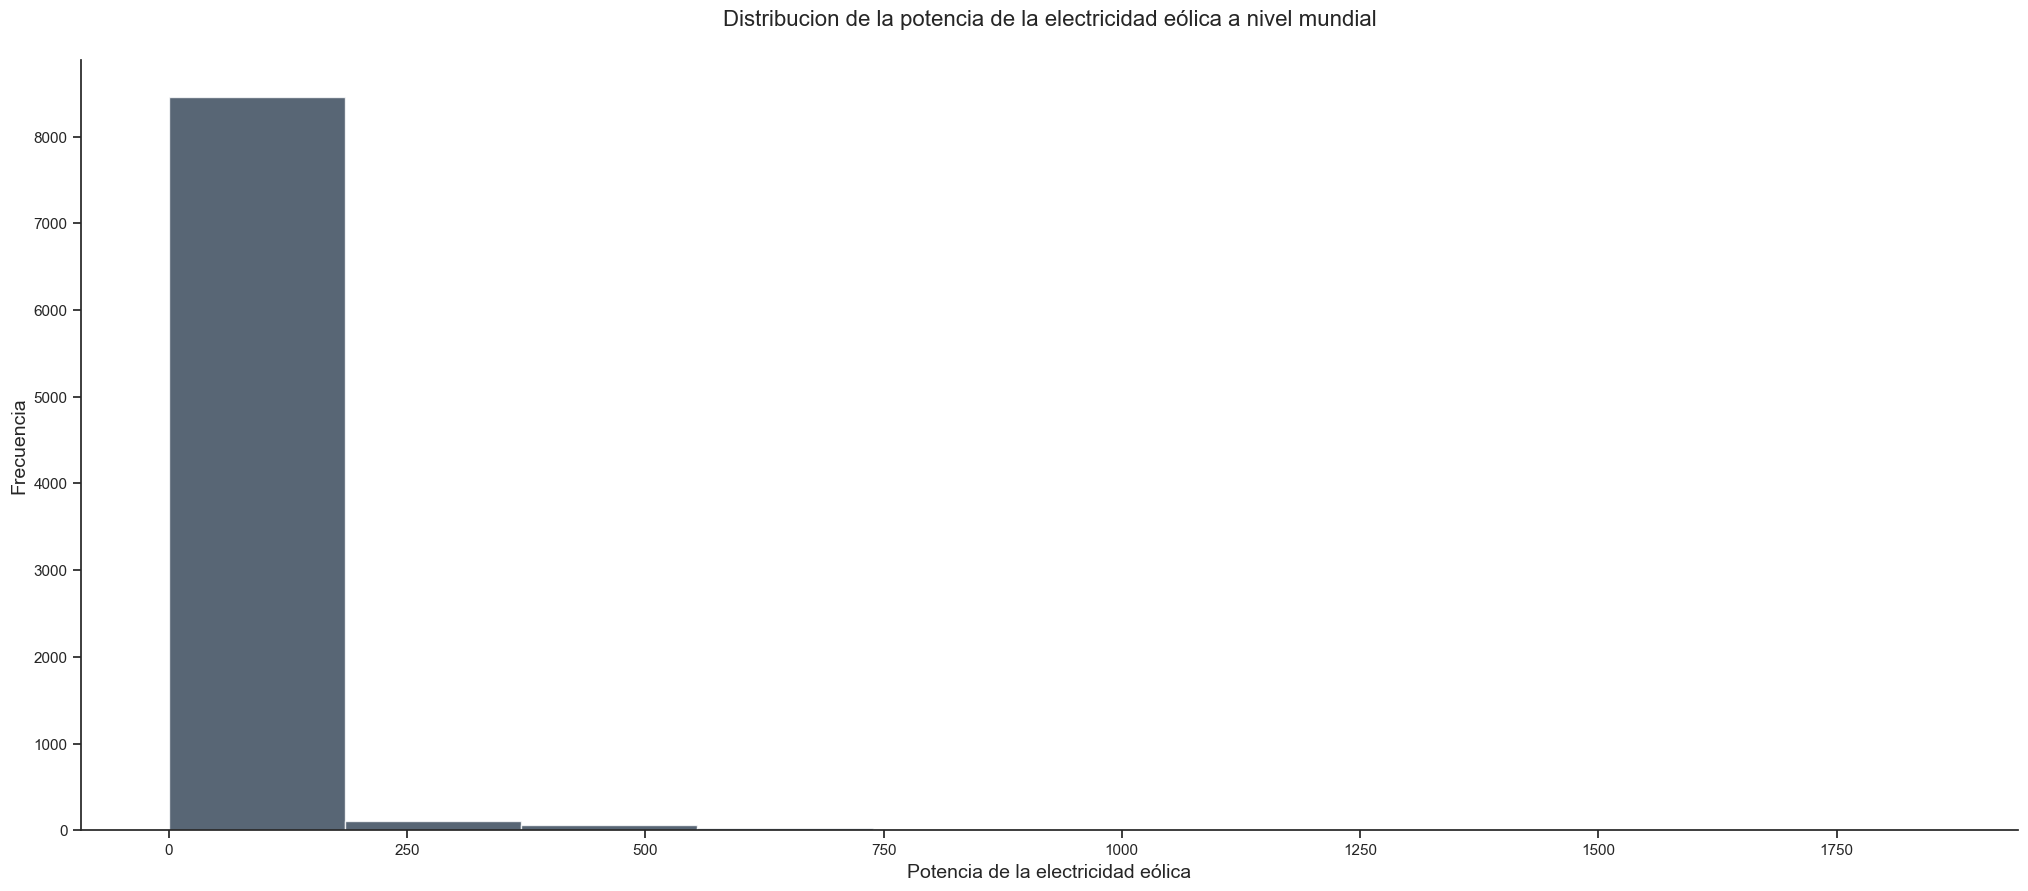

In [84]:
#Histograma con matplotlib
# Grafico ee eólica
plt.figure()
plt.hist(ee_renov_mundial['eólica'].dropna(), bins=10, color="#2E4053", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad eólica", size=14)
plt.title("Distribucion de la potencia de la electricidad eólica a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

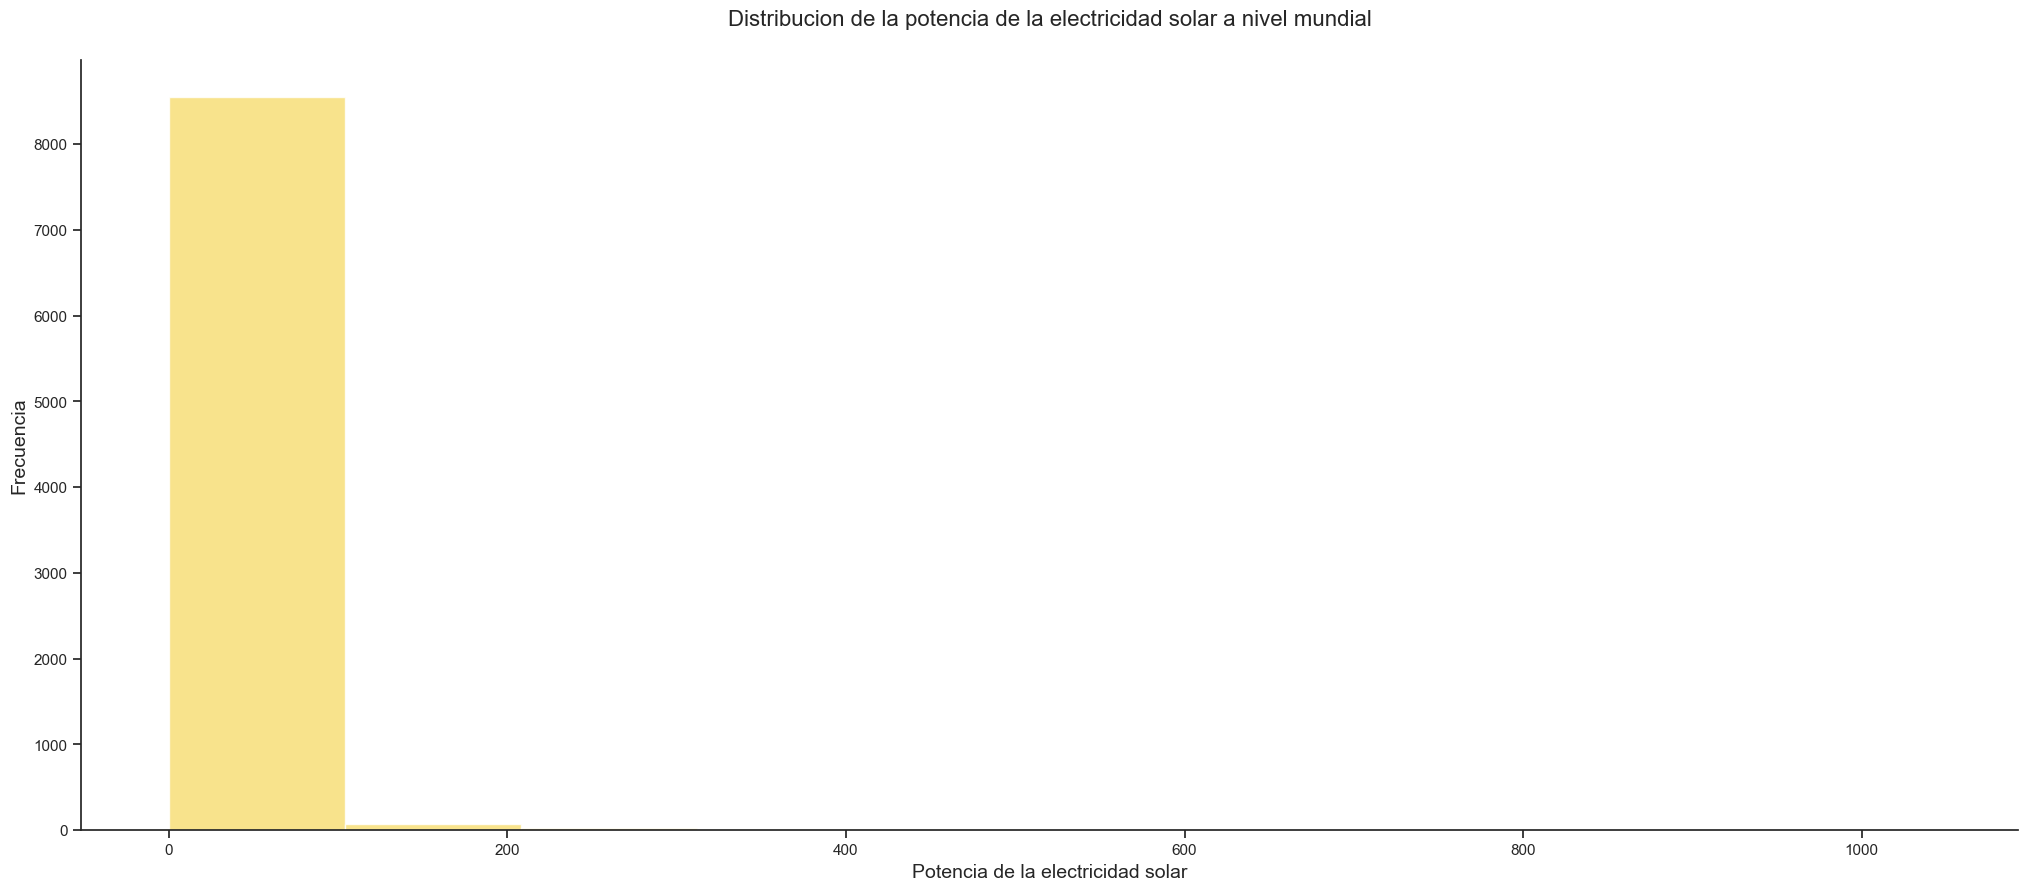

In [85]:
#Histograma con matplotlib
# Grafico ee solar
plt.figure()
plt.hist(ee_renov_mundial['solar'].dropna(), bins=10, color="#F7DC6F", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad solar", size=14)
plt.title("Distribucion de la potencia de la electricidad solar a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

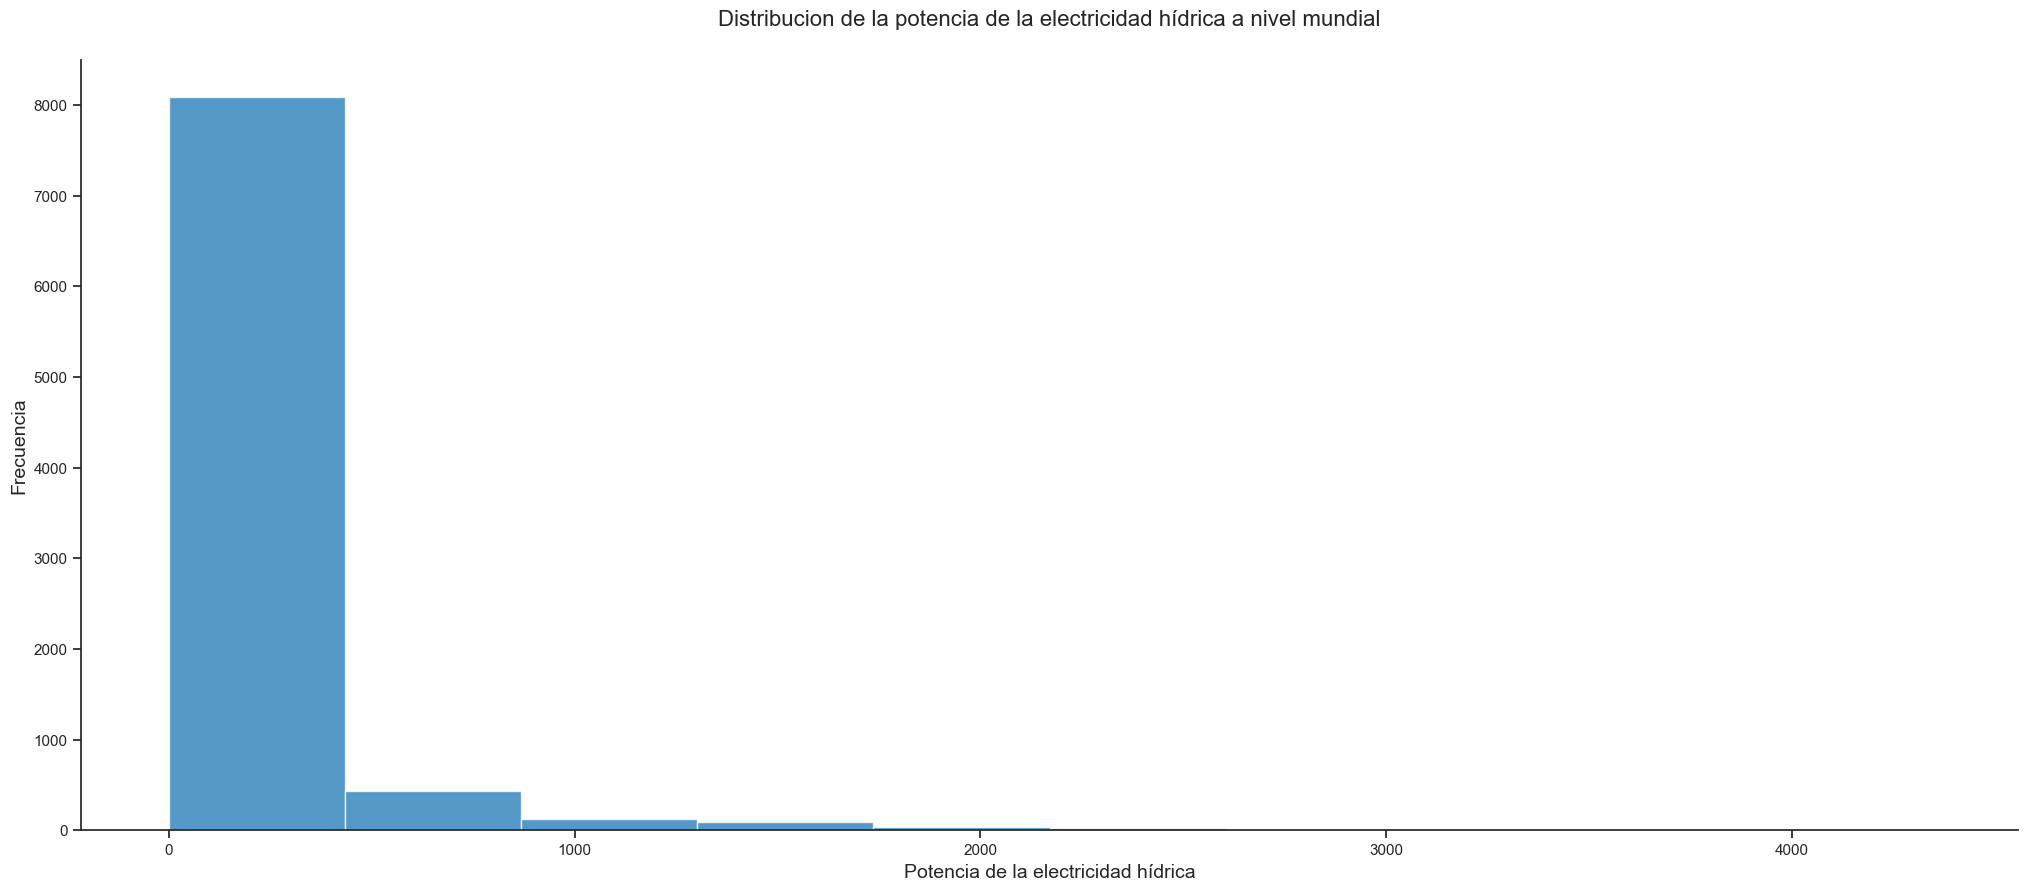

In [86]:
#Histograma con matplotlib
# Grafico ee hídrica
plt.figure()
plt.hist(ee_renov_mundial['hídrica'].dropna(), bins=10, color="#2980B9", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad hídrica", size=14)
plt.title("Distribucion de la potencia de la electricidad hídrica a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

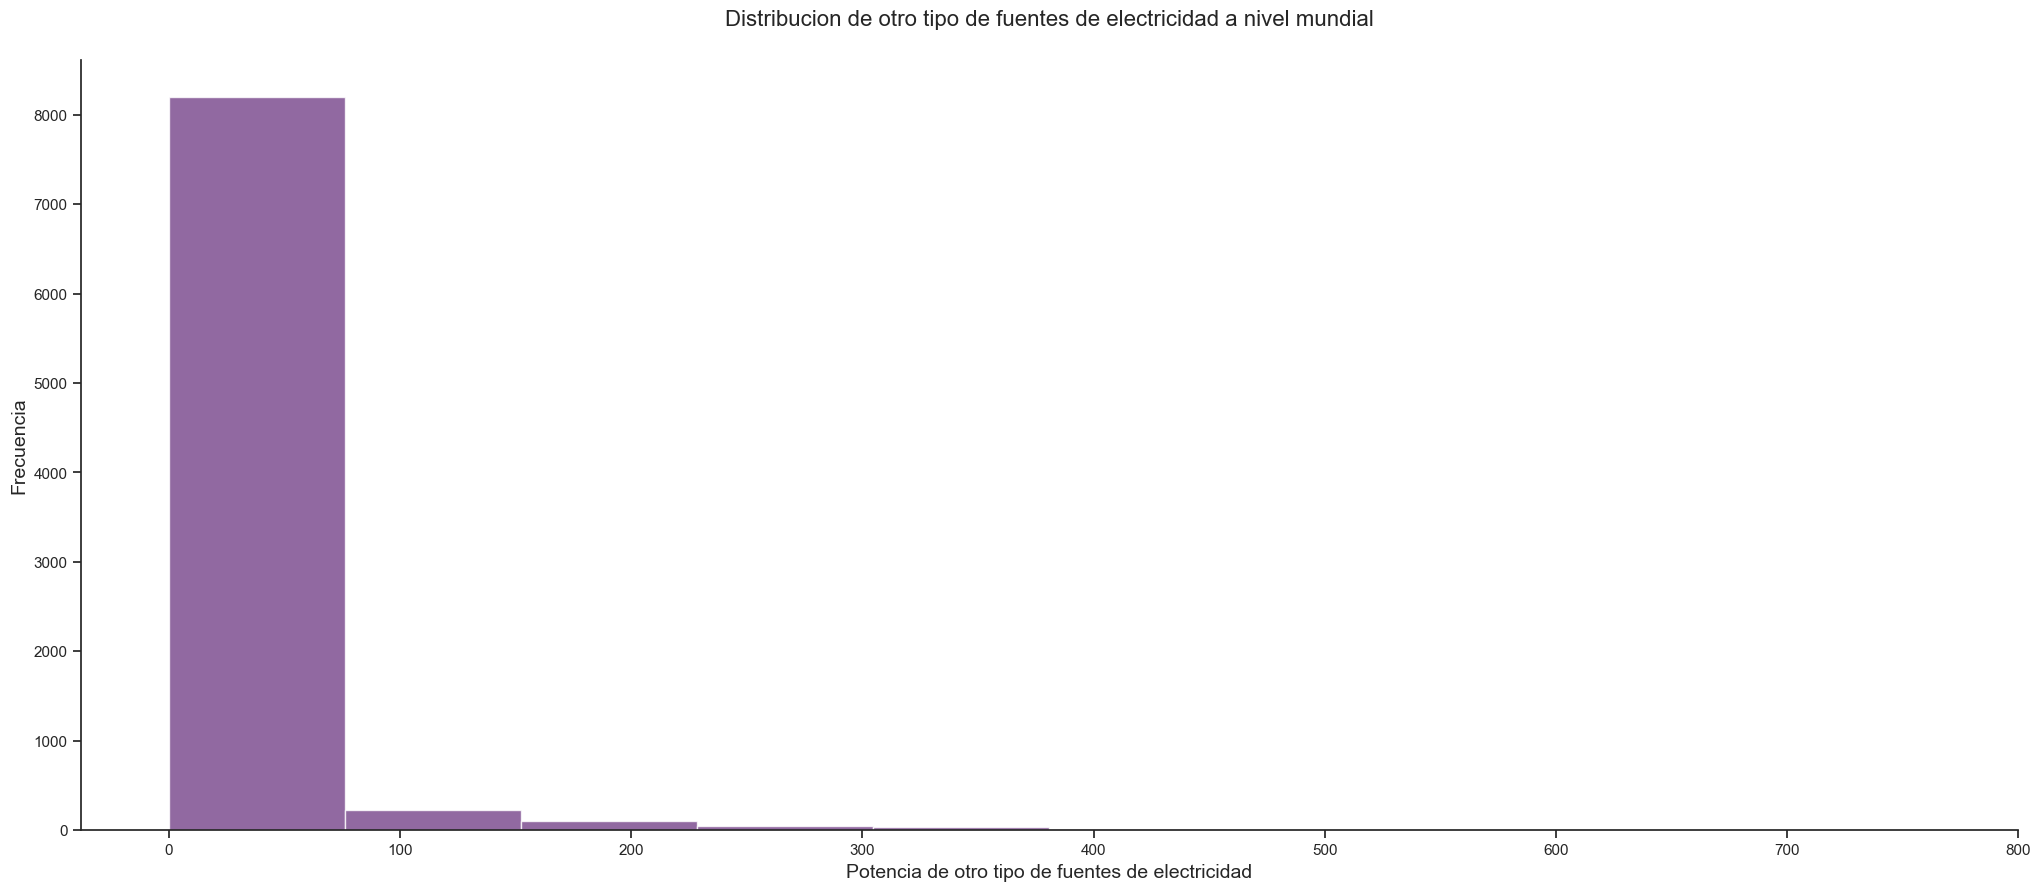

In [87]:
#Histograma con matplotlib
# Grafico otras ee
plt.figure()
plt.hist(ee_renov_mundial['otras'].dropna(), bins=10, color="#76448A", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de otro tipo de fuentes de electricidad", size=14)
plt.title("Distribucion de otro tipo de fuentes de electricidad a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

In [88]:
#En este caso los histogramas por variable no serían muy buenos para representar las variables continuas ni tampoco para comparar 
#si no se normalizan los ejes

Text(0.5, 1.0, 'Valores faltantes')

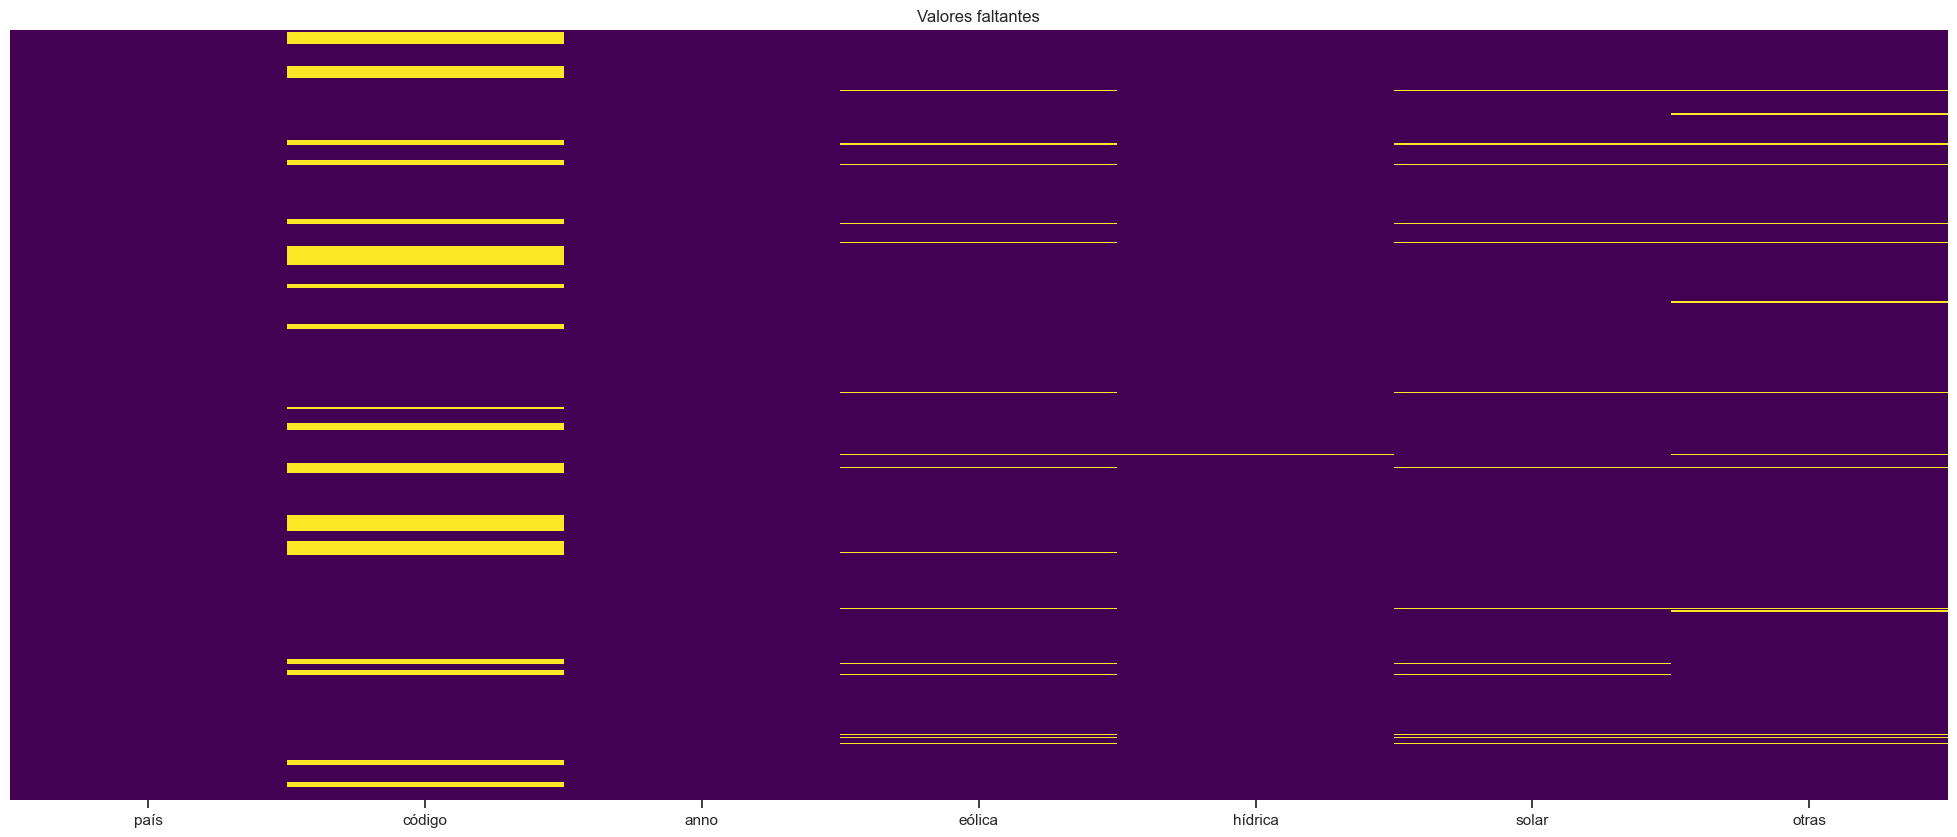

In [89]:
# visualización de valores faltantes
plt.rcParams['figure.figsize'] = (25,10)
sns.heatmap(ee_renov_mundial.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Valores faltantes")

### DATA SET FILTRADO 2013-2022

Debido a la falta de información correspondiente a años previos decidimos tomar como referencia los años a partir del 2013 al 2022

# DESCRIPCIÓN DE LOS DATOS

In [90]:
ee_renov_13_22 = ee_renov_mundial[(ee_renov_mundial['anno'] >= 2013) & (ee_renov_mundial['anno'] <= 2022)]
print(ee_renov_13_22 )

             país código  anno  eólica  hídrica  solar  otras
13    Afghanistan    AFG  2013     0.0     0.86   0.03   0.00
14    Afghanistan    AFG  2014     0.0     0.97   0.03   0.00
15    Afghanistan    AFG  2015     0.0     1.00   0.03   0.00
16    Afghanistan    AFG  2016     0.0     1.02   0.04   0.00
17    Afghanistan    AFG  2017     0.0     1.05   0.04   0.00
...           ...    ...   ...     ...      ...    ...    ...
8846     Zimbabwe    ZWE  2017     0.0     3.97   0.01   0.32
8847     Zimbabwe    ZWE  2018     0.0     5.05   0.02   0.39
8848     Zimbabwe    ZWE  2019     0.0     4.17   0.03   0.38
8849     Zimbabwe    ZWE  2020     0.0     3.81   0.03   0.35
8850     Zimbabwe    ZWE  2021     0.0     4.00   0.04   0.38

[2250 rows x 7 columns]


In [91]:
#exportar dataset filtrado
ee_renov_13_22.to_csv('ee_renov_13_22.csv', encoding='utf-8', index=False)

In [92]:
ee_renov_13_22.head()

país código  anno  eólica  hídrica  solar  otras
13  Afghanistan    AFG  2013     0.0     0.86   0.03    0.0
14  Afghanistan    AFG  2014     0.0     0.97   0.03    0.0
15  Afghanistan    AFG  2015     0.0     1.00   0.03    0.0
16  Afghanistan    AFG  2016     0.0     1.02   0.04    0.0
17  Afghanistan    AFG  2017     0.0     1.05   0.04    0.0

In [93]:
ee_renov_13_22.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 13 to 8850
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   país     2250 non-null   object 
 1   código   1942 non-null   object 
 2   anno     2250 non-null   int64  
 3   eólica   2241 non-null   float64
 4   hídrica  2240 non-null   float64
 5   solar    2250 non-null   float64
 6   otras    2214 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 140.6+ KB


In [94]:
#valores faltantes en cantidad de registros (absolutos)
valores_faltantes_abs = ee_renov_13_22.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes y los ordena de mayor a menor
        # según la columna
valores_faltantes_abs

código     308
otras       36
hídrica     10
eólica       9
país         0
anno         0
solar        0
dtype: int64

In [95]:
#valores faltantes en % respecto al total (relativos)
valores_faltantes_rel =ee_renov_13_22.isna().sum()/ee_renov_13_22.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )

código     13.688889
otras       1.600000
hídrica     0.444444
eólica      0.400000
país        0.000000
anno        0.000000
solar       0.000000
dtype: float64


In [96]:
#Si bien disminuye el % de datos faltantes en cada una de las variables, no es una disminución tan sustancial
#teniendo en cuenta que se redujo el dataset en 25% (de 8851 a 2250 registros)

In [97]:
ee_renov_13_22.describe()

anno       eólica      hídrica        solar        otras
count  2250.000000  2241.000000  2240.000000  2250.000000  2214.000000
mean   2017.060889    44.755956   139.454752    19.145103    23.636676
std       2.625647   160.389977   471.805644    76.783219    78.210488
min    2013.000000     0.000000     0.000000     0.000000     0.000000
25%    2015.000000     0.000000     0.010000     0.000000     0.000000
50%    2017.000000     0.010000     1.870000     0.030000     0.100000
75%    2019.000000     2.320000    19.622500     1.047500     3.390000
max    2022.000000  1848.260000  4340.610000  1040.500000   761.930050

In [98]:
#distribución de países, valores absolutos
ee_renov_13_22['país'].value_counts()


Latvia         10
Germany        10
Ireland        10
Netherlands    10
Hungary        10
               ..
Guatemala       9
Guinea          9
Zimbabwe        9
Kosovo          8
Albania         8
Name: país, Length: 247, dtype: int64

In [99]:
#aún con el filtrado de años, hay varios países que no tienen registros en los años seleccionados (2013 -2022)

In [100]:
print (ee_renov_13_22['país'].value_counts().unique())

[10  9  8]


In [101]:
#distribución de países, valores relativos
ee_renov_13_22['país'].value_counts(normalize=True)

Latvia         0.004444
Germany        0.004444
Ireland        0.004444
Netherlands    0.004444
Hungary        0.004444
                 ...   
Guatemala      0.004000
Guinea         0.004000
Zimbabwe       0.004000
Kosovo         0.003556
Albania        0.003556
Name: país, Length: 247, dtype: float64

In [102]:
#países incluidos en el dataset filtrado
ee_renov_13_22['país'].unique()


array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (BP)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (BP)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa (BP)', 'Ecuador', 'Egypt

In [103]:
#Cantidad de países incluidos en el dataset filtrado
cant_paises = ee_renov_13_22['país'].unique()
cant_paises.shape


(247,)

# VISUALIZACIÓN DE LOS DATOS
## Dataset filtrado 2013-2022

In [104]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#Tipo de dato de cada columna
#se puede remplazar por ee_renov_mundial.info()
ee_renov_13_22.dtypes

país        object
código      object
anno         int64
eólica     float64
hídrica    float64
solar      float64
otras      float64
dtype: object

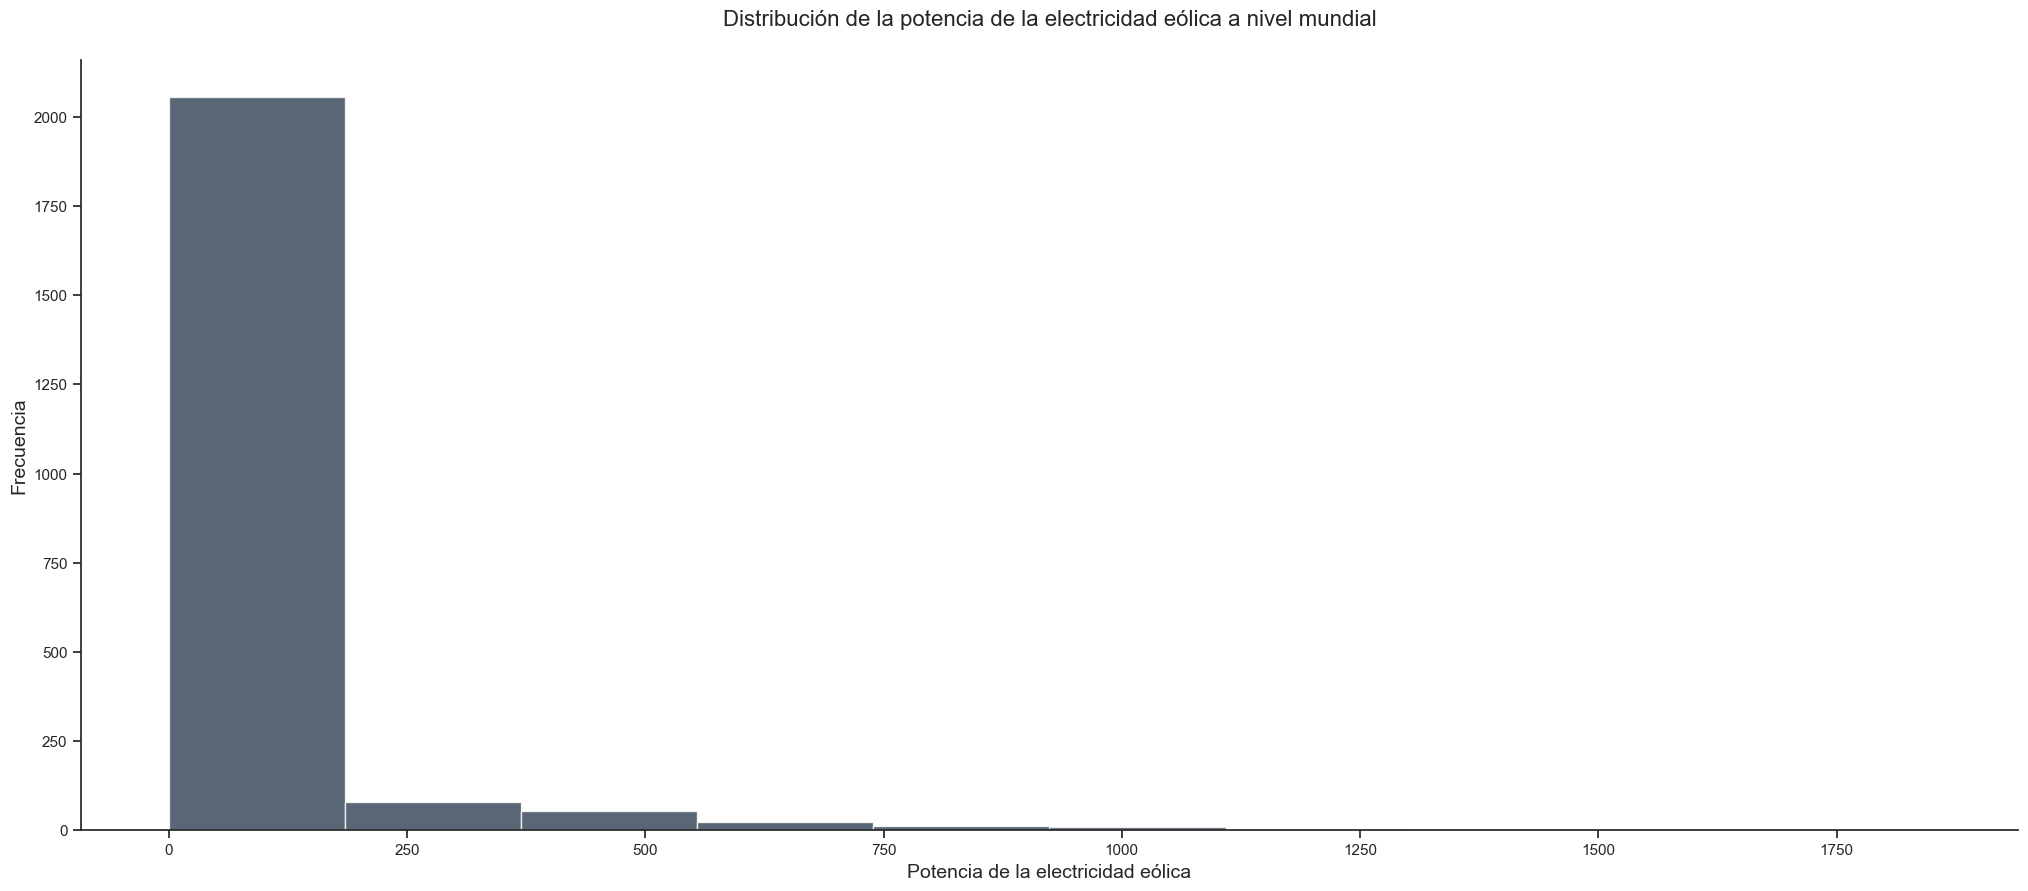

In [106]:
#Histograma con matplotlib
# Grafico ee eólica
plt.figure()
plt.hist(ee_renov_13_22['eólica'].dropna(), bins=10, color="#2E4053", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad eólica", size=14)
plt.title("Distribución de la potencia de la electricidad eólica a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

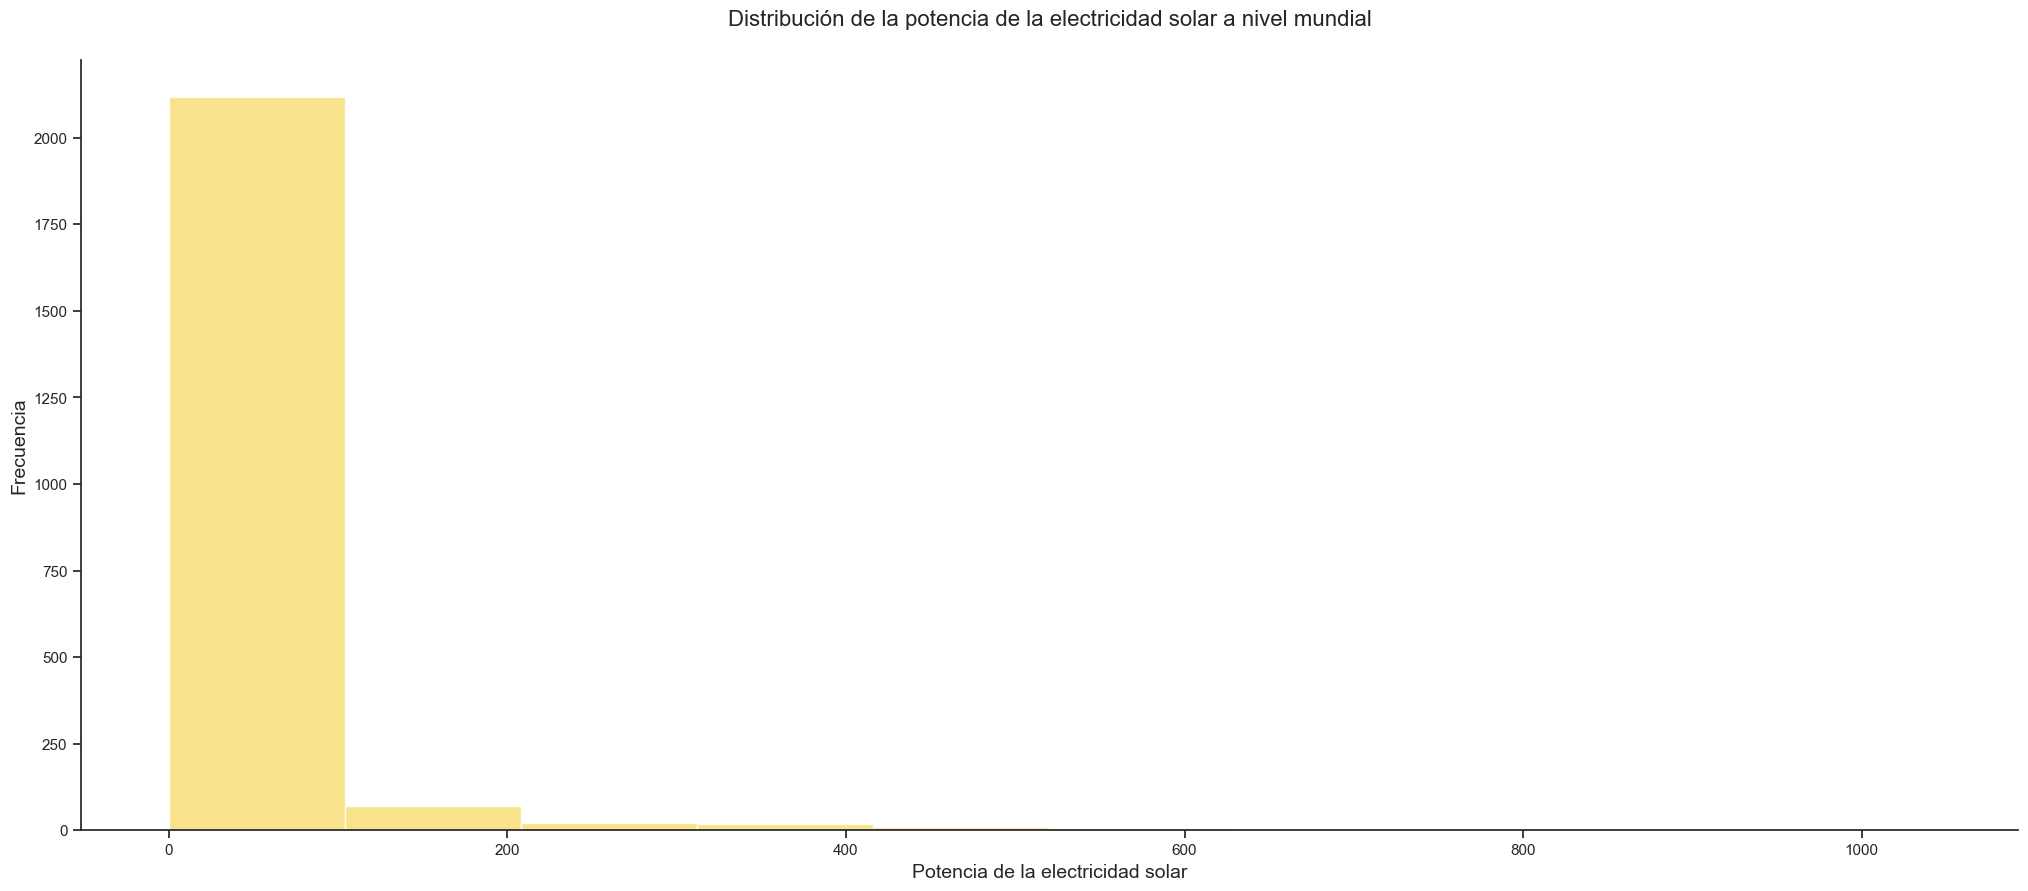

In [107]:
#Histograma con matplotlib
# Grafico ee solar
plt.figure()
plt.hist(ee_renov_13_22['solar'].dropna(), bins=10, color="#F7DC6F", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad solar", size=14)
plt.title("Distribución de la potencia de la electricidad solar a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

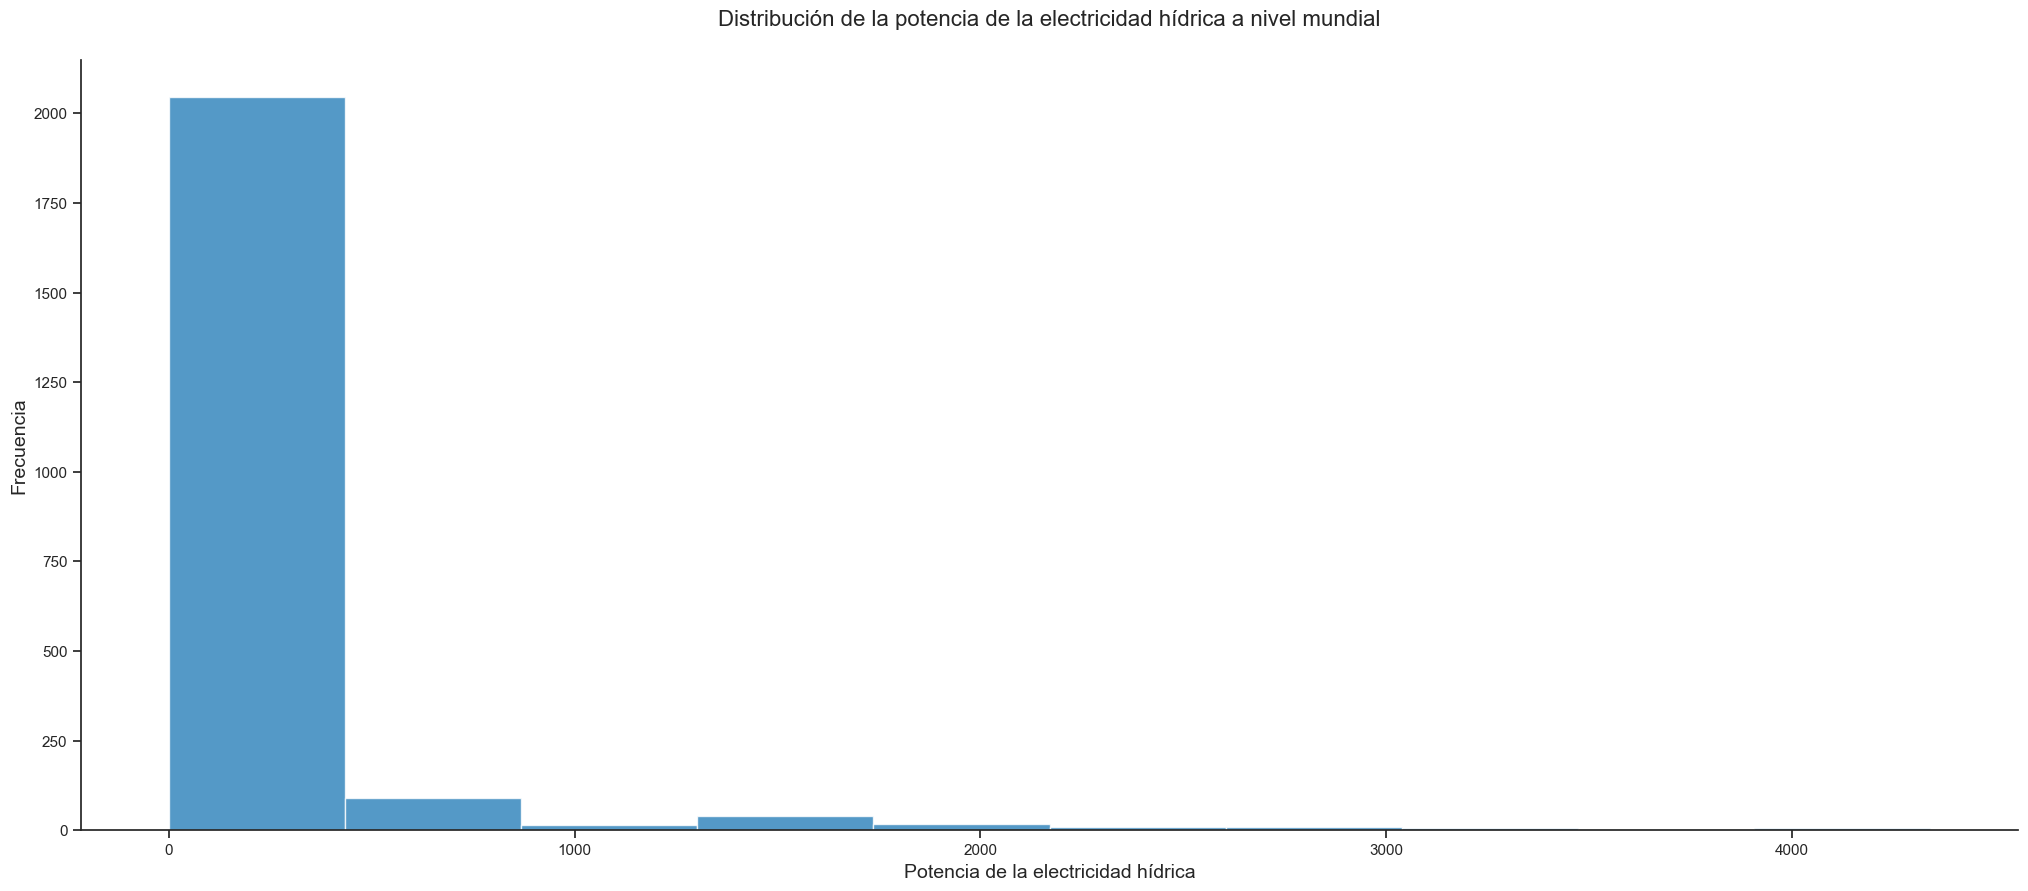

In [108]:
#Histograma con matplotlib
# Grafico ee hídrica
plt.figure()
plt.hist(ee_renov_13_22['hídrica'].dropna(), bins=10, color="#2980B9", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de la electricidad hídrica", size=14)
plt.title("Distribución de la potencia de la electricidad hídrica a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

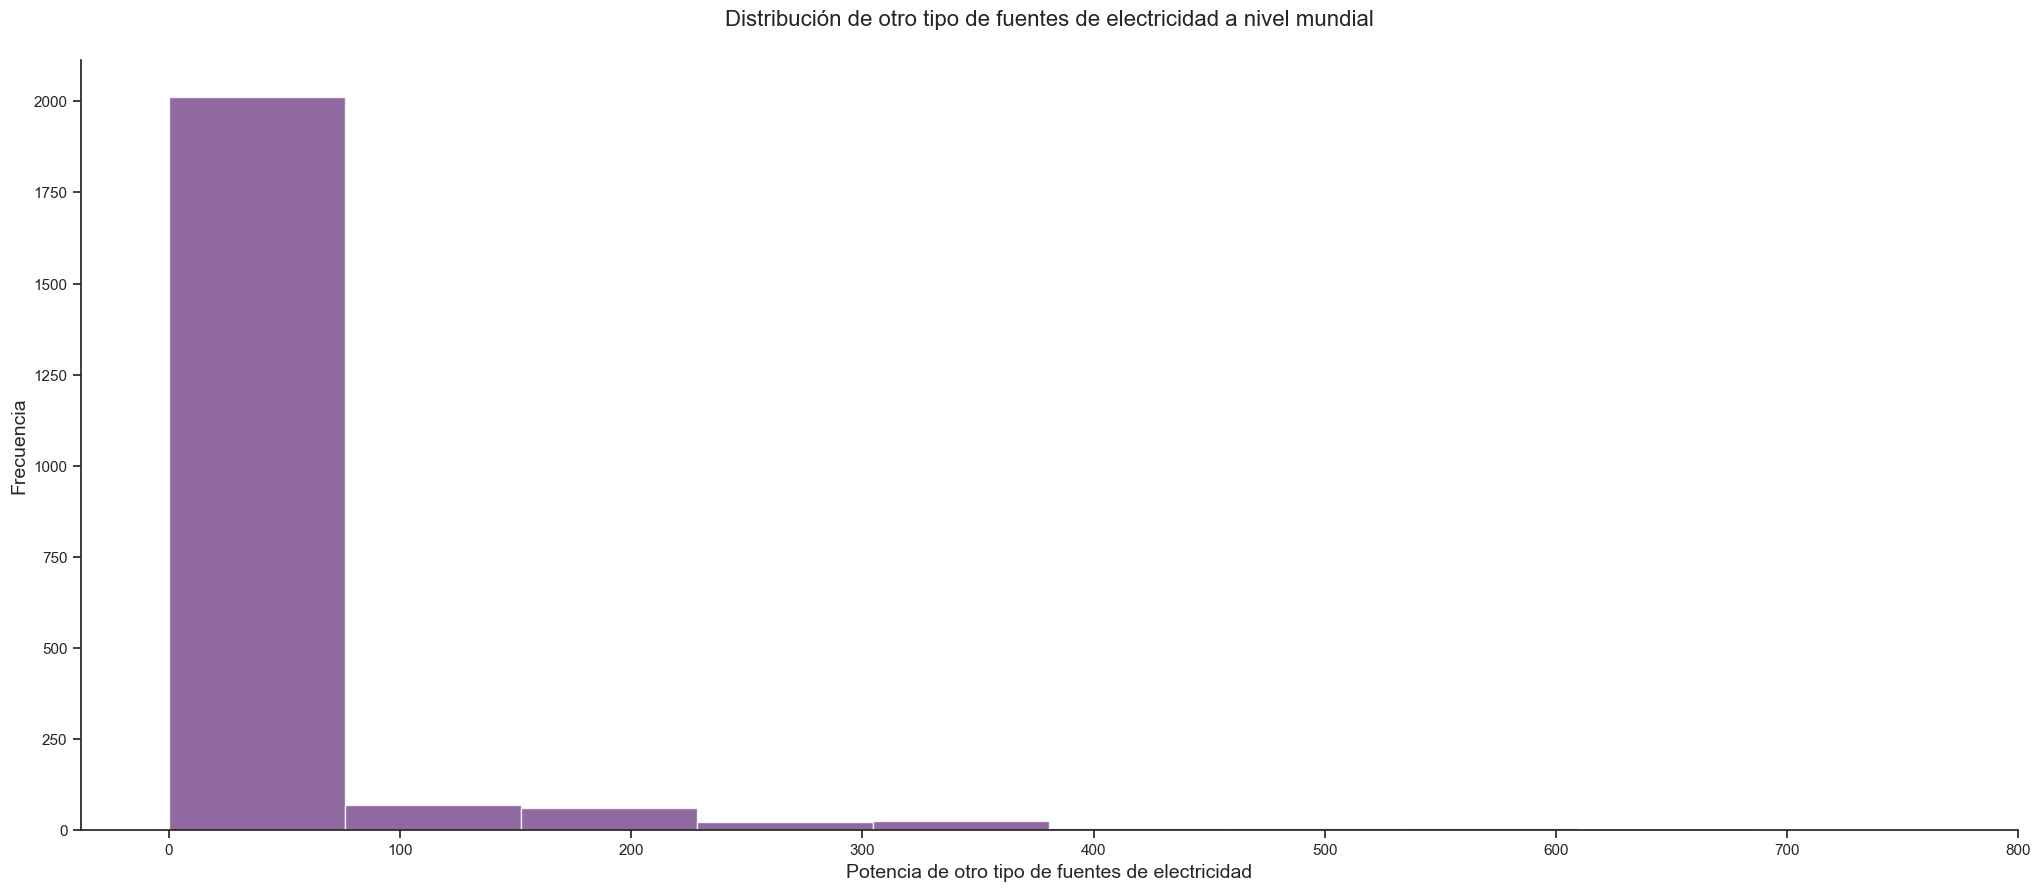

In [109]:
#Histograma con matplotlib
# Grafico otras ee
plt.figure()
plt.hist(ee_renov_13_22['otras'].dropna(), bins=10, color="#76448A", alpha=0.8)
plt.ylabel("Frecuencia", size=14)
plt.xlabel("Potencia de otro tipo de fuentes de electricidad", size=14)
plt.title("Distribución de otro tipo de fuentes de electricidad a nivel mundial", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

In [110]:
#Cuestiones emergentes:
#Los ejes no están normalizados para poder comparar, o al menos mismo tamaño intervalo.

Text(0.5, 1.0, 'Valores faltantes dataset filtrado')

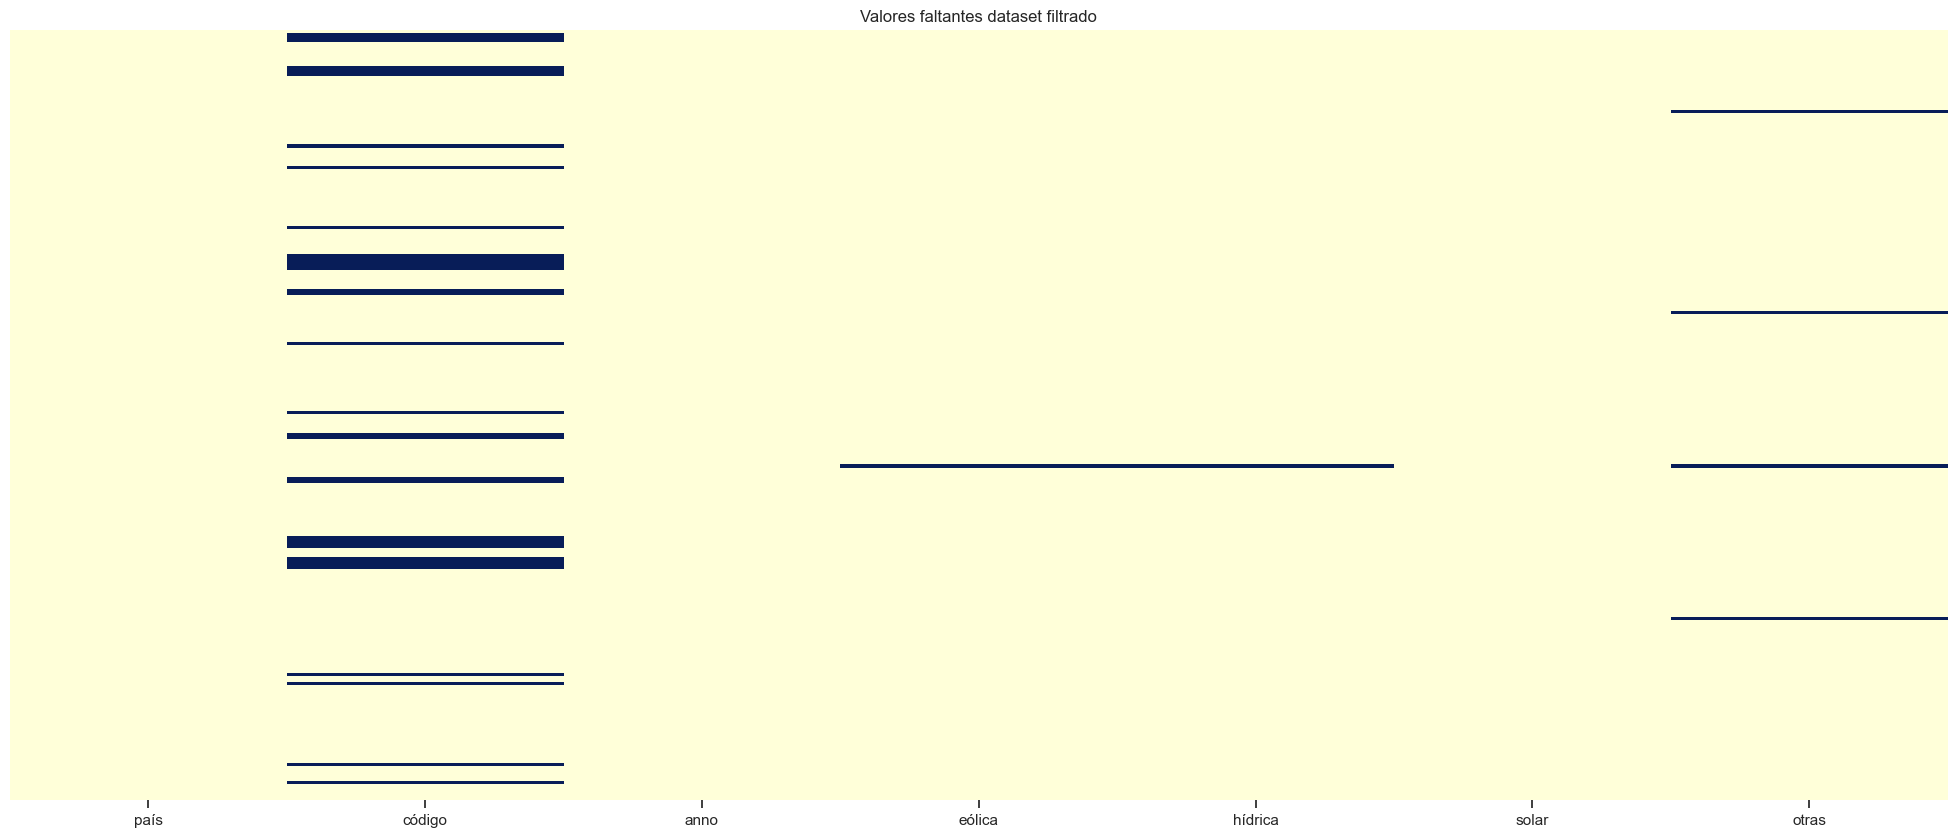

In [111]:
# visualización de valores faltantes
#Colocar debajo de la descripción de datos faltantes
plt.rcParams['figure.figsize'] = (25,10)
sns.heatmap(ee_renov_13_22.isnull(),yticklabels = False, cbar = False , cmap = 'YlGnBu')
plt.title("Valores faltantes dataset filtrado")

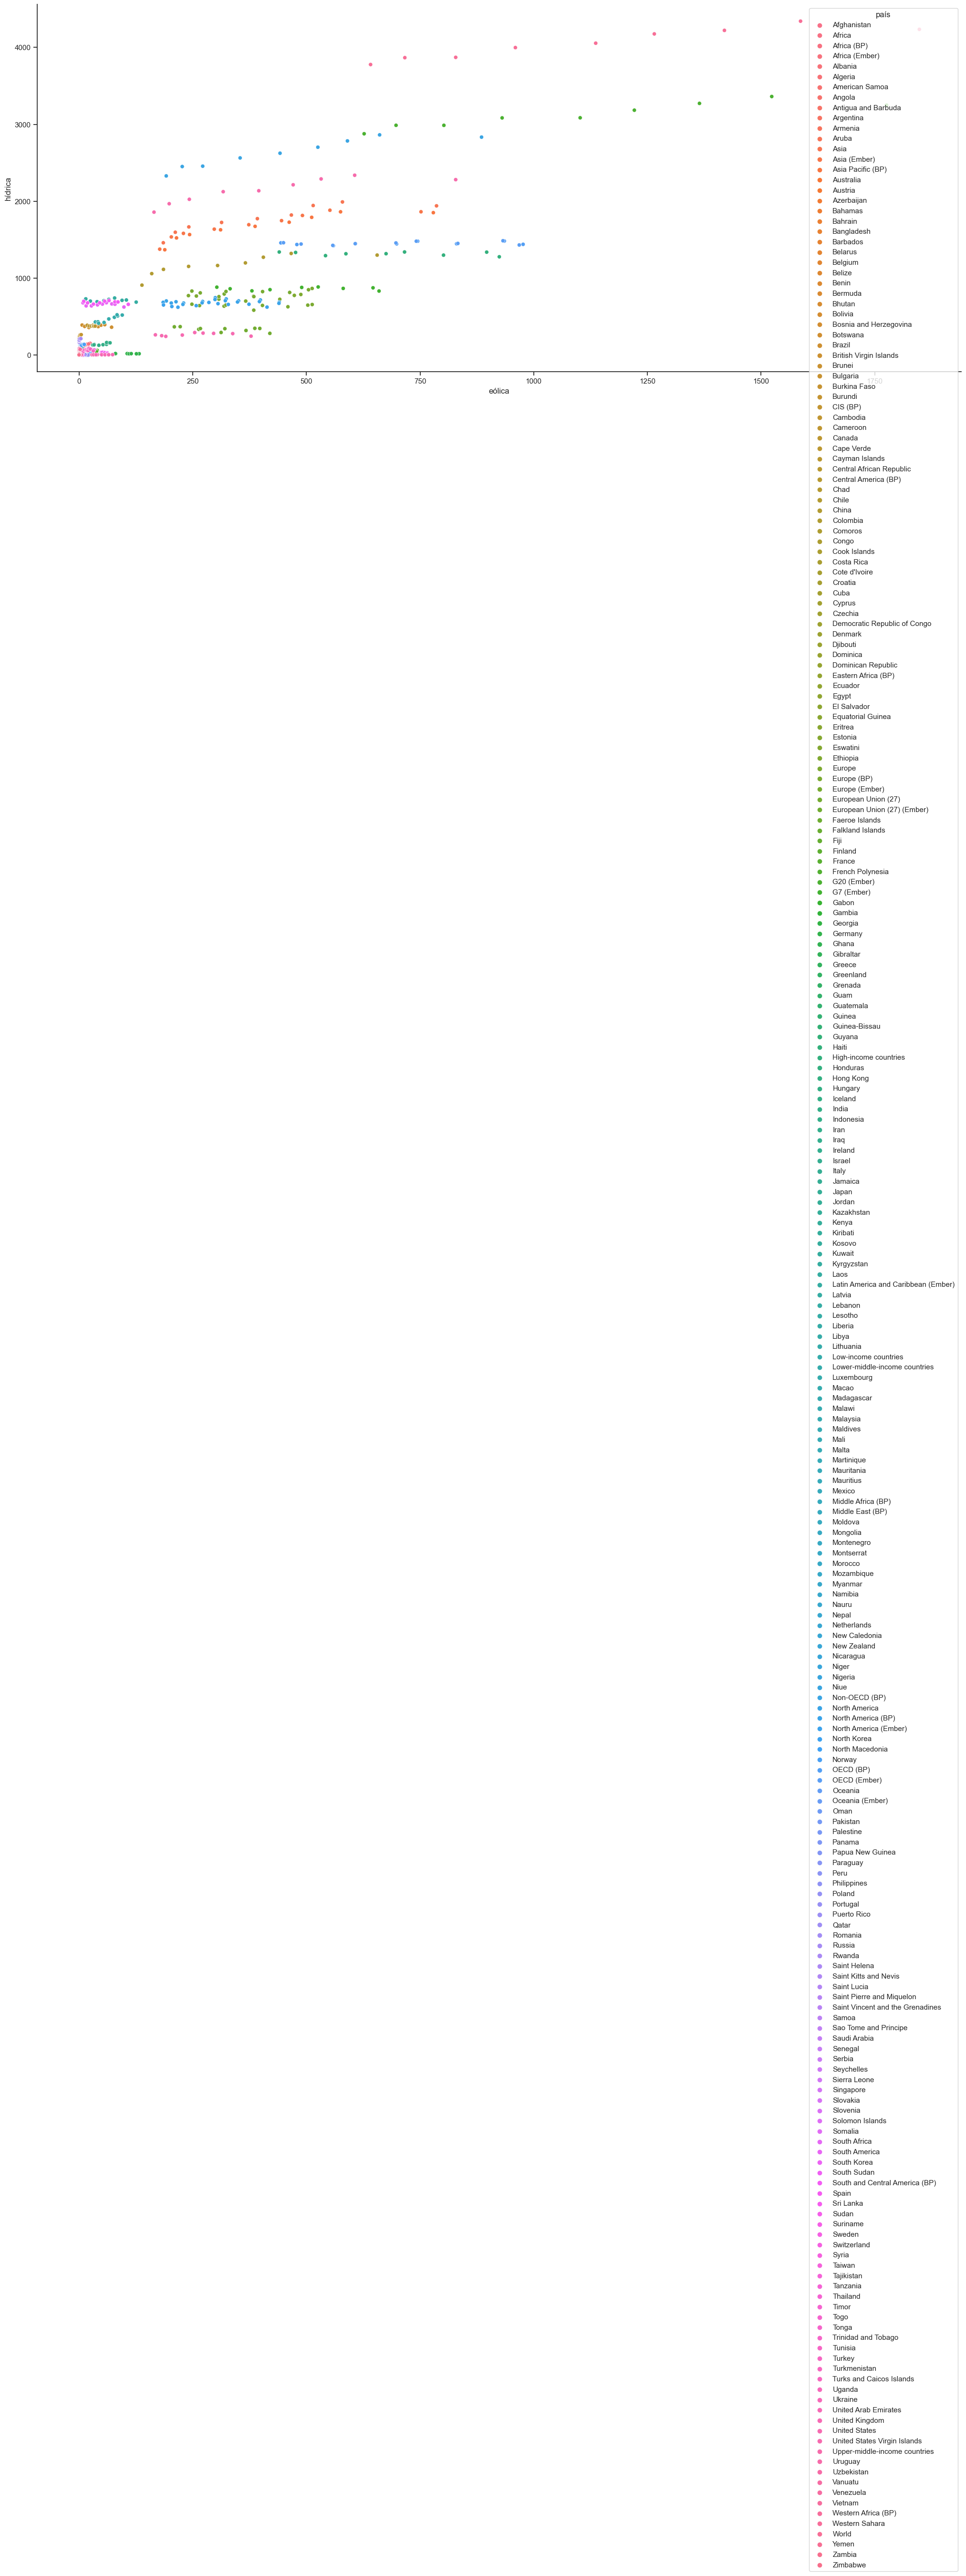

In [112]:
#scatterplot
plt.figure()
sns.scatterplot(x="eólica", y="hídrica",data=ee_renov_13_22, hue = "país")
sns.despine()
plt.show();

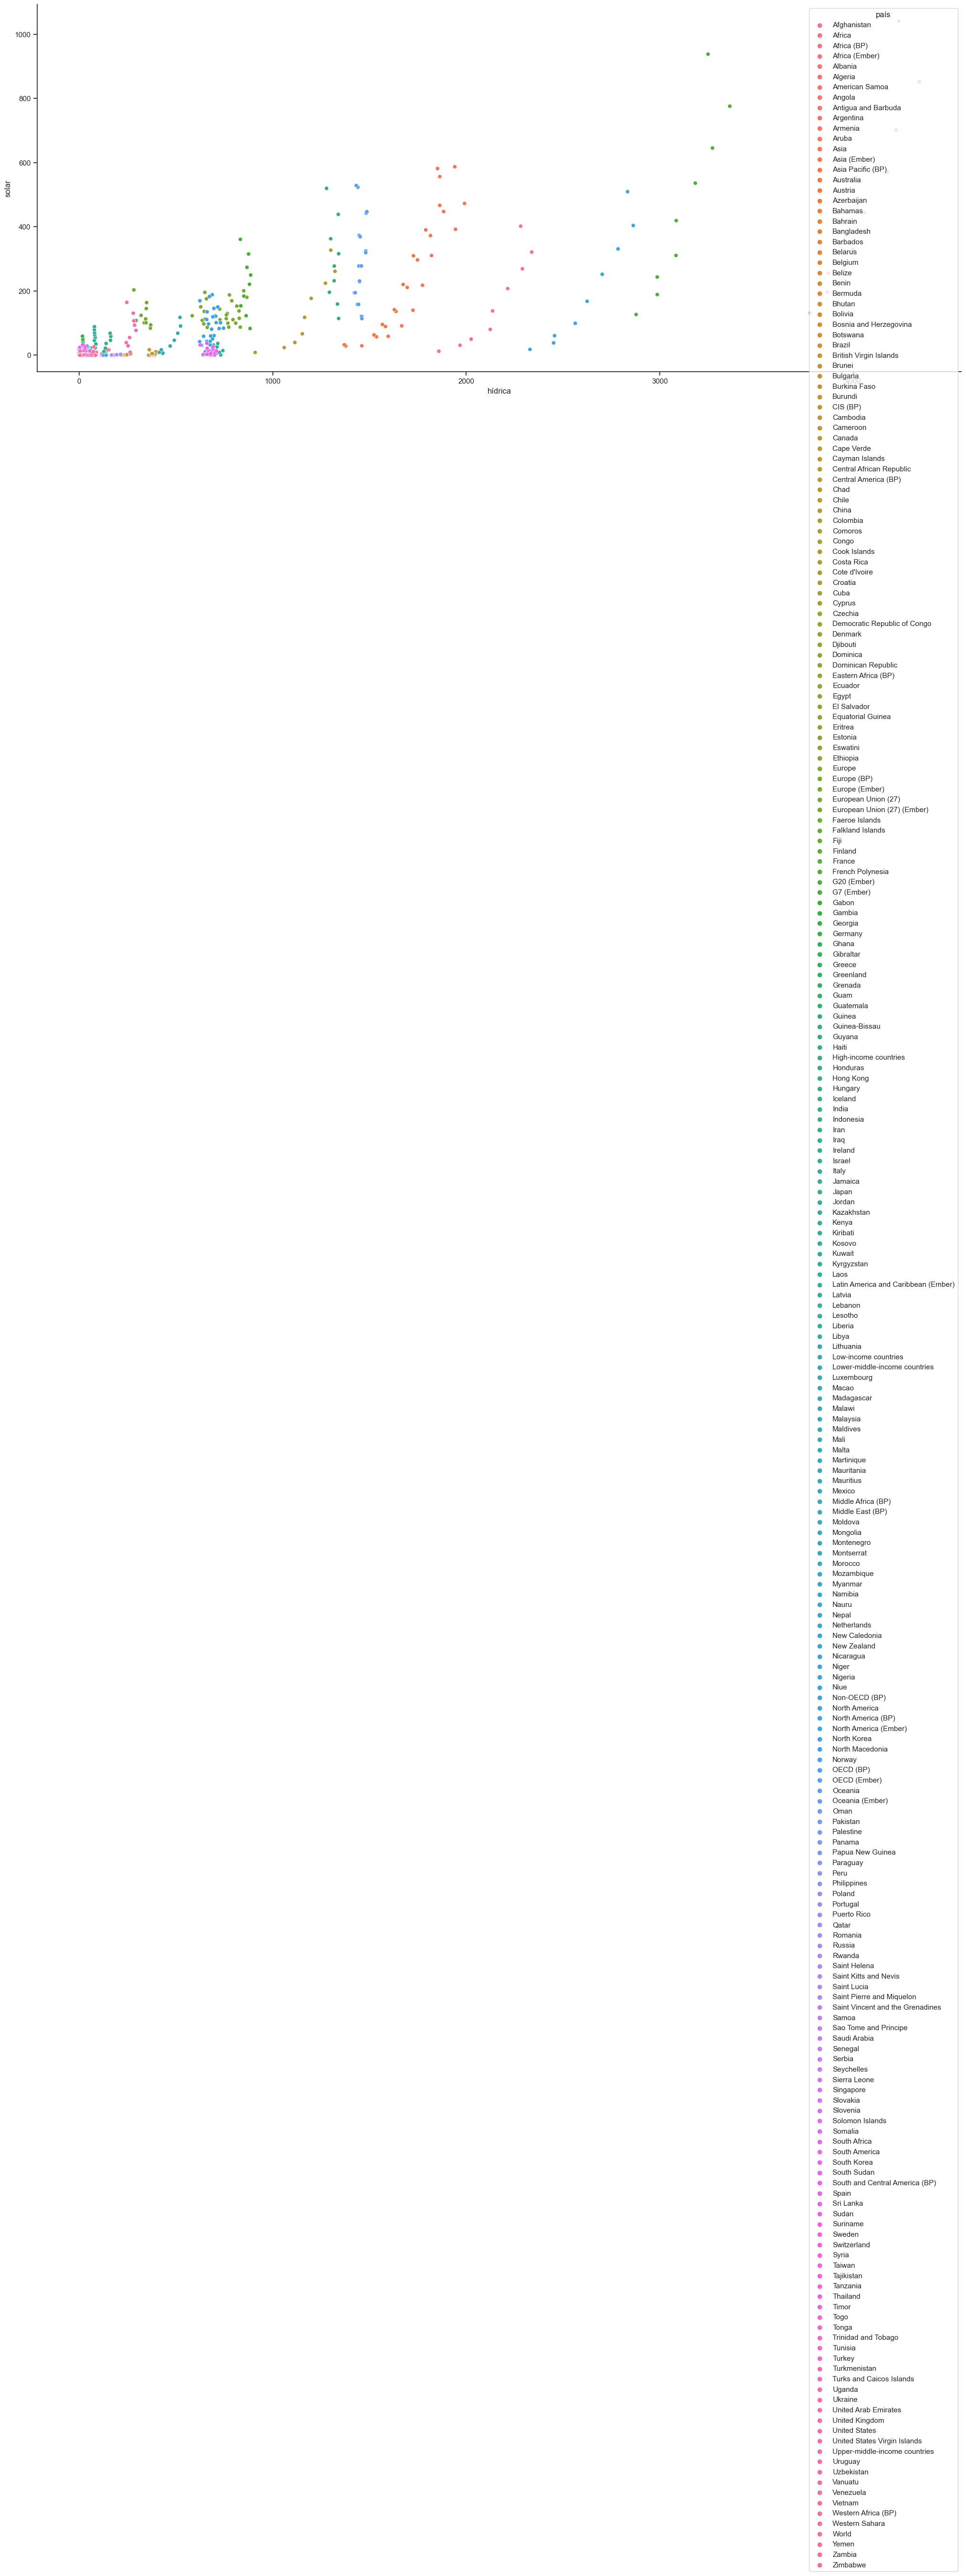

In [113]:
#scatterplot
plt.figure()
sns.scatterplot(x="hídrica", y="solar",data=ee_renov_13_22, hue = "país")
sns.despine()
plt.show();

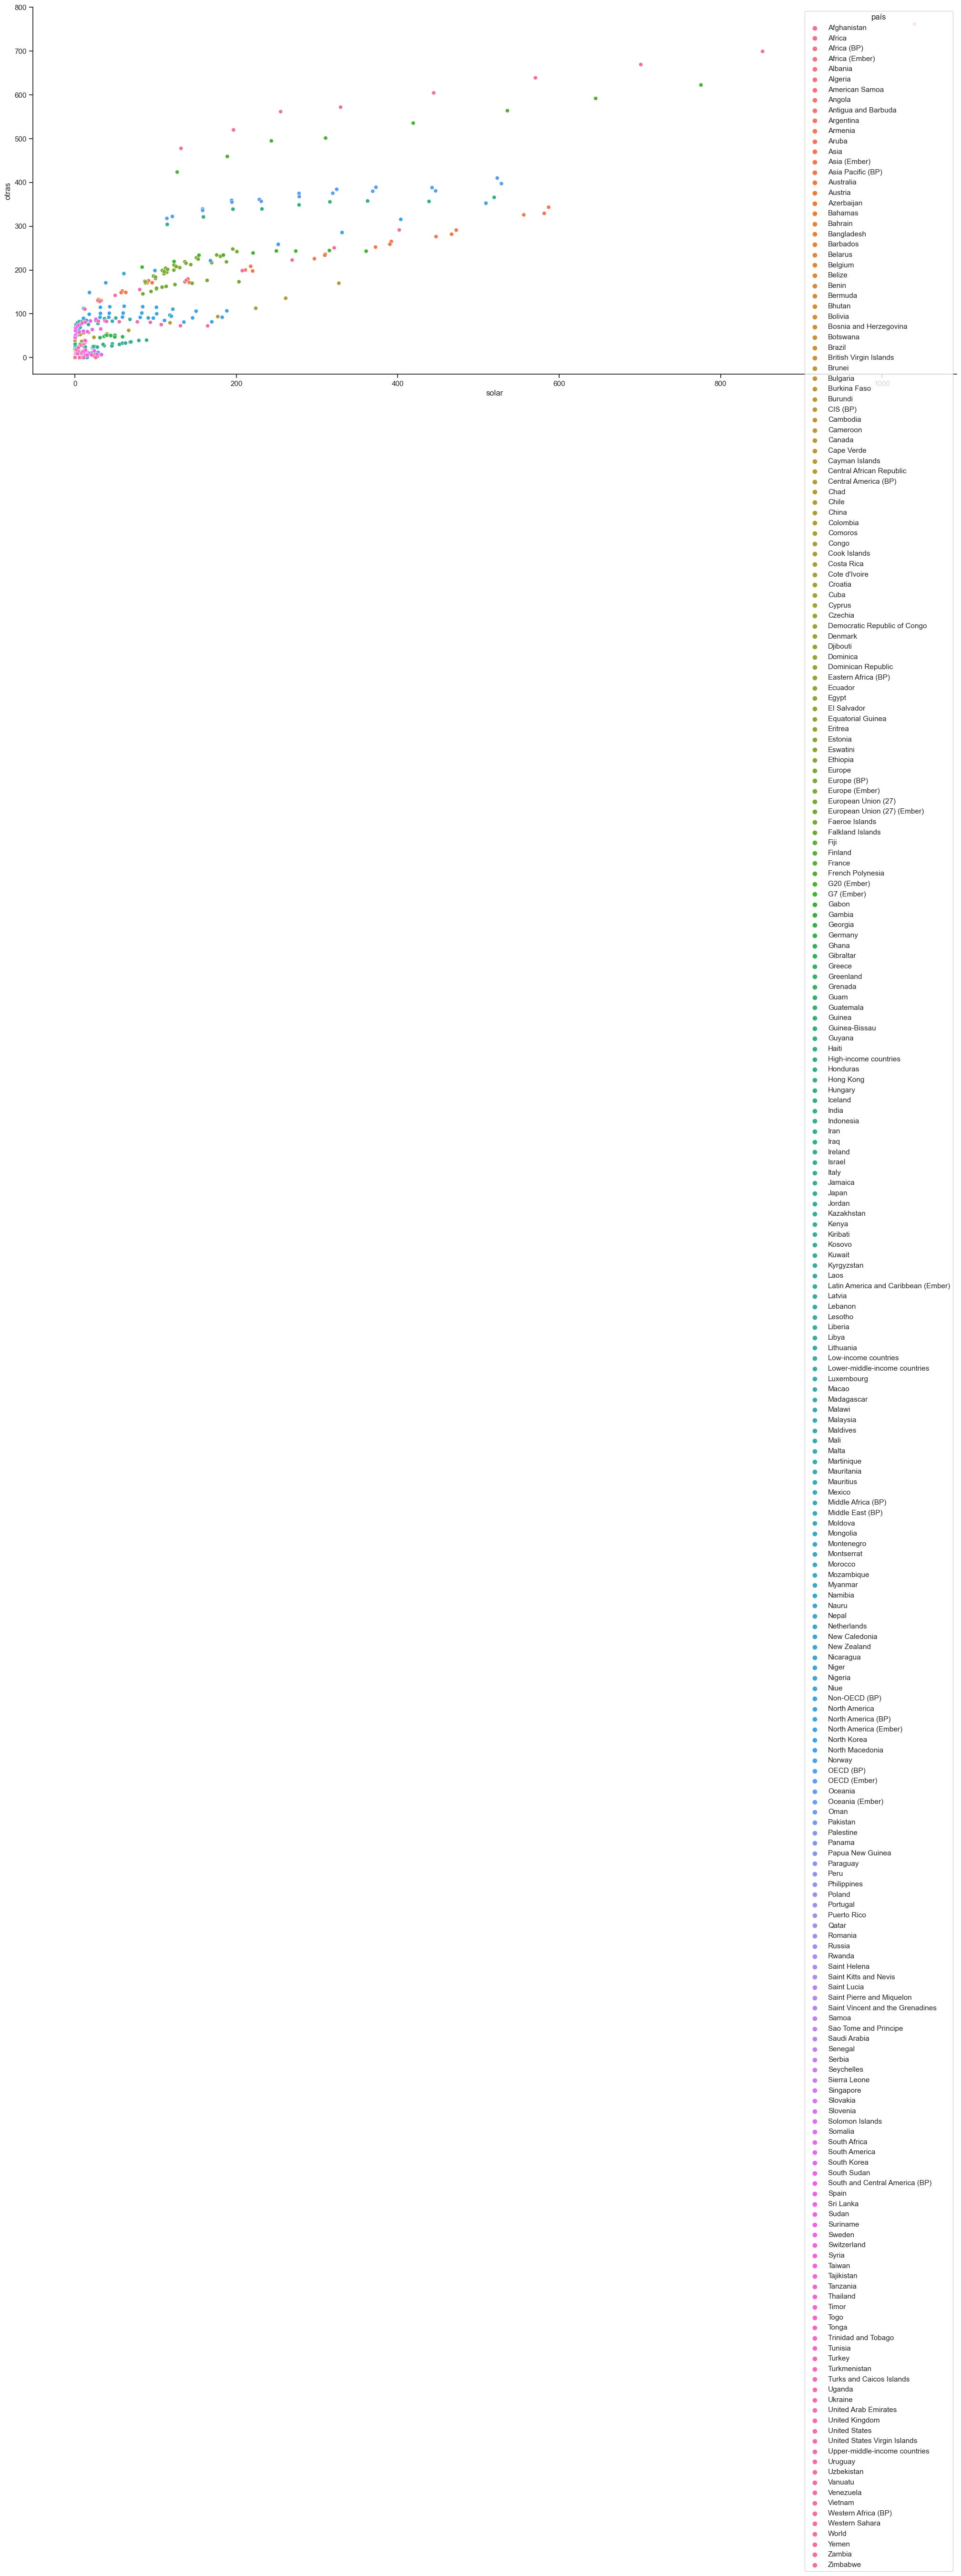

In [114]:
#scatterplot
plt.figure()
sns.scatterplot(x="solar", y="otras",data=ee_renov_13_22, hue = "país")
sns.despine()
plt.show();

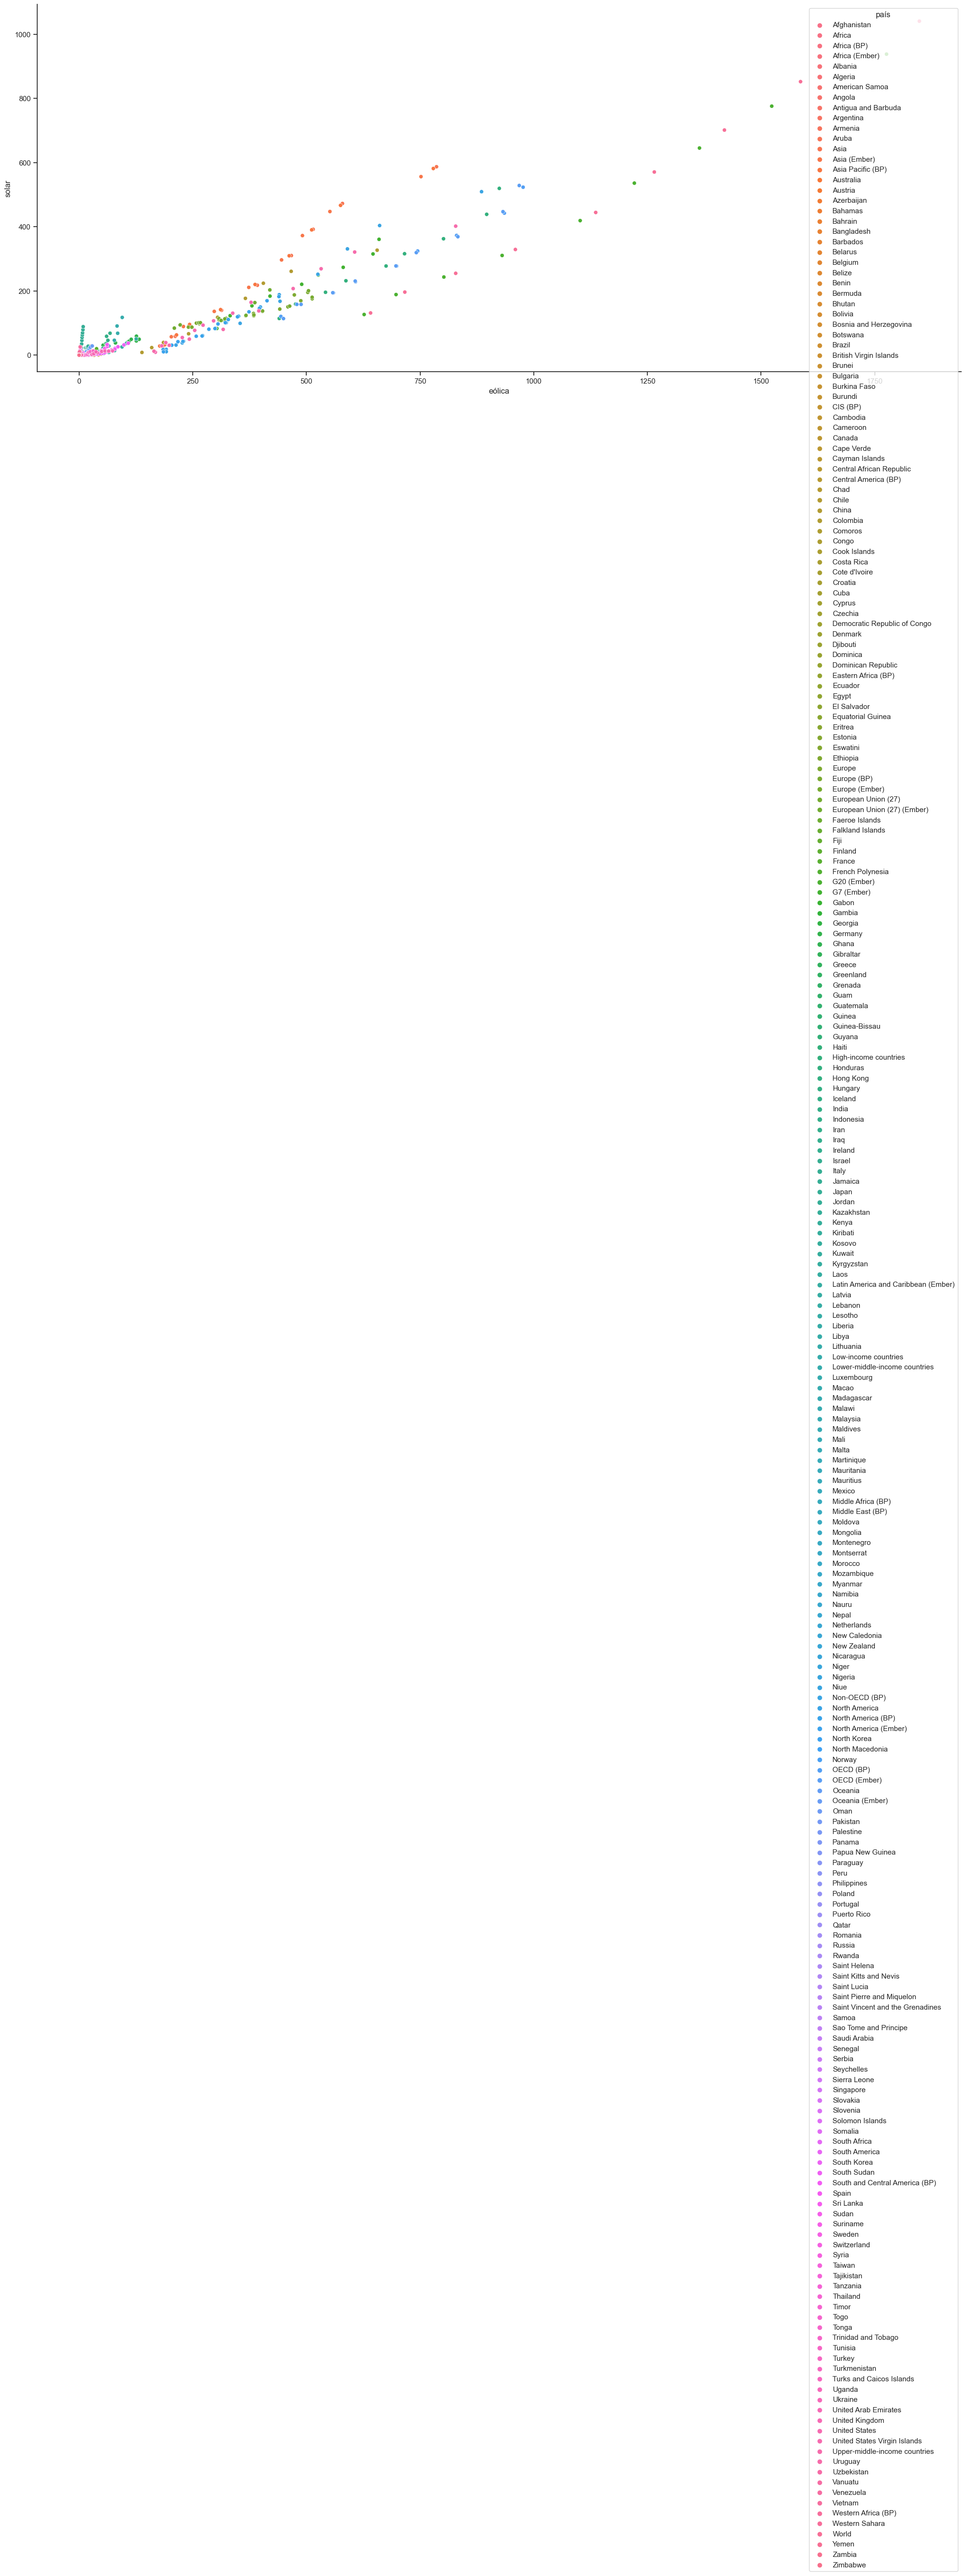

In [115]:
#scatterplot
plt.figure()
sns.scatterplot(x="eólica", y="solar",data=ee_renov_13_22, hue = "país")
sns.despine()
plt.show();

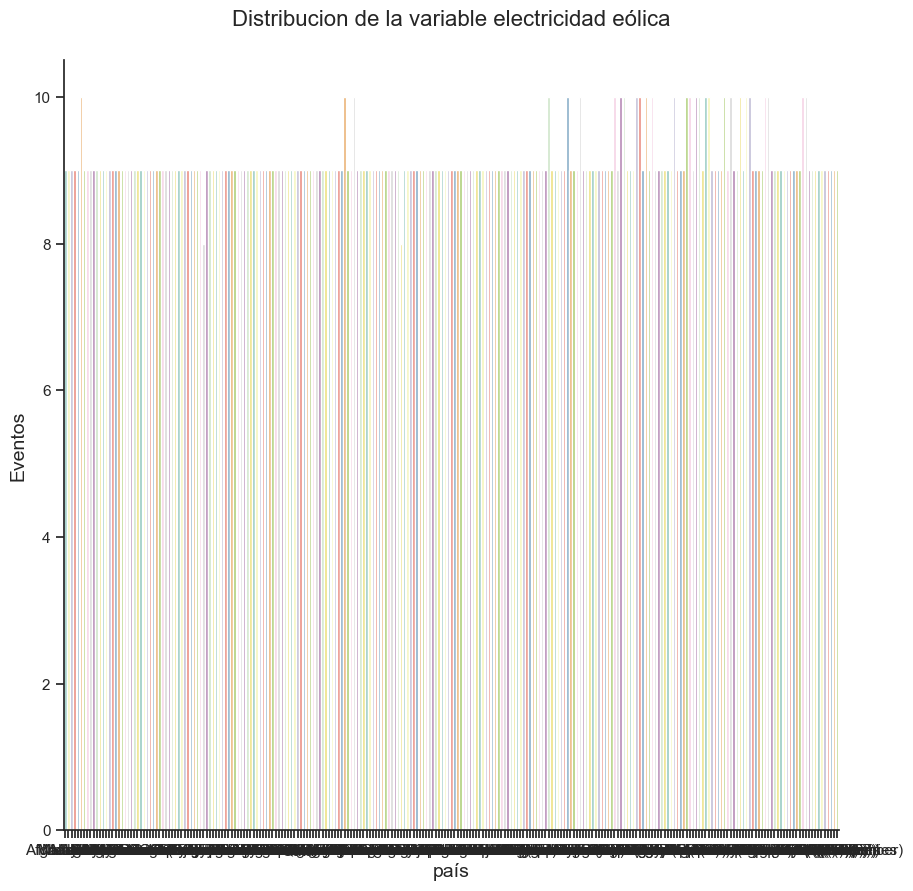

In [116]:
#Distribución de las variables por países
#countplot ee eólica
plt.figure(figsize=(10,10))


sns.countplot(x="país", data=ee_renov_13_22.sort_values('eólica'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("país", size=14)
plt.title("Distribucion de la variable electricidad eólica", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

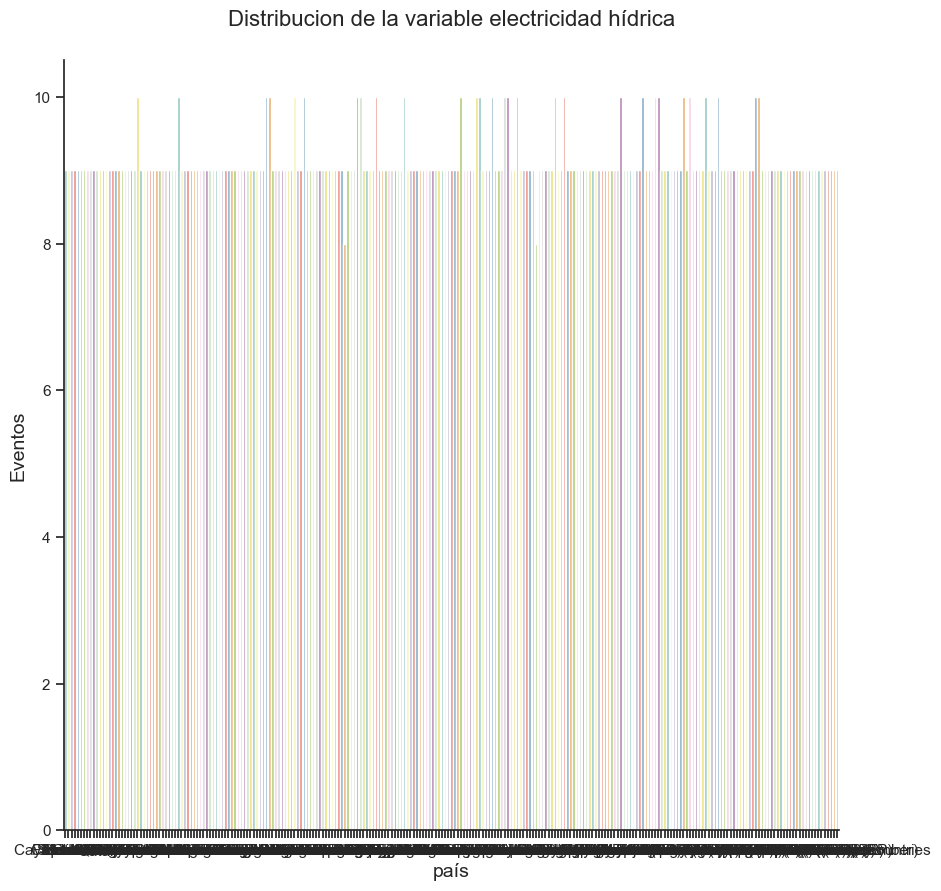

In [117]:
#Distribución de las variables por países
#countplot ee hídrica
plt.figure(figsize=(10,10))


sns.countplot(x="país", data=ee_renov_13_22.sort_values('hídrica'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("país", size=14)
plt.title("Distribucion de la variable electricidad hídrica", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

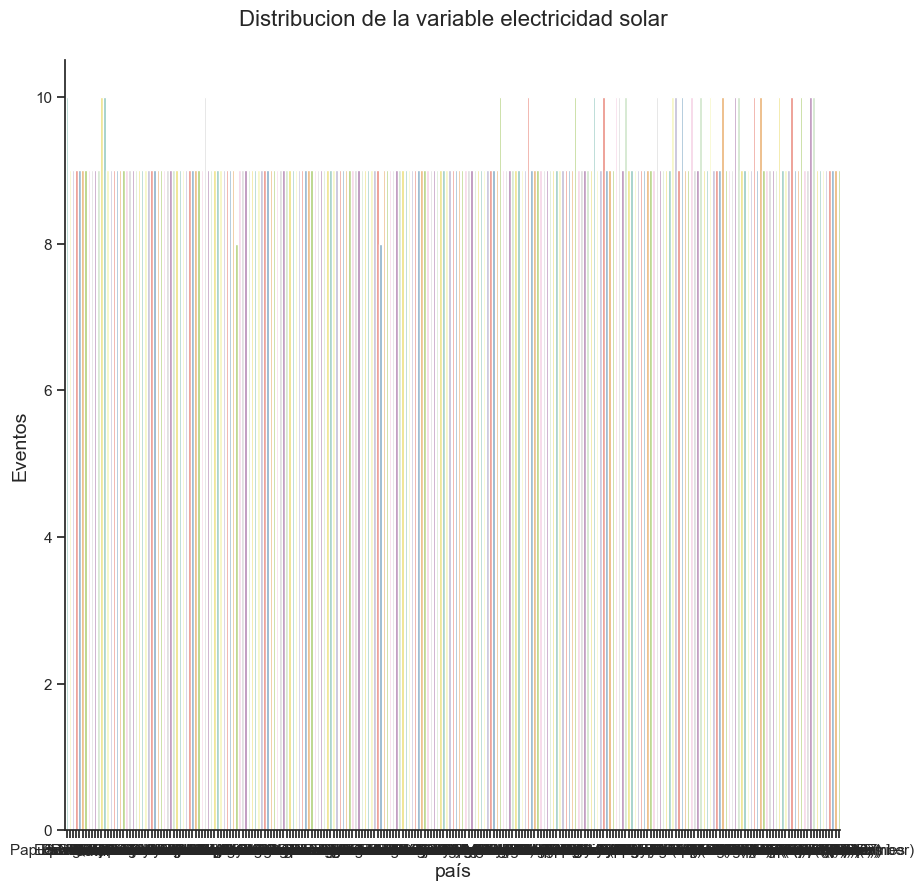

In [118]:
#Distribución de las variables por países
#countplot ee hídrica
plt.figure(figsize=(10,10))


sns.countplot(x="país", data=ee_renov_13_22.sort_values('solar'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("país", size=14)
plt.title("Distribucion de la variable electricidad solar", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

In [119]:
#llevar el periodo a 8 años no mejora sustancialmente el % de datos faltantes tampoco
ee_renov_15_22 = ee_renov_mundial[(ee_renov_mundial['anno'] >= 2015) & (ee_renov_mundial['anno'] <= 2022)]
print(ee_renov_15_22 )

             país código  anno  eólica  hídrica  solar  otras
15    Afghanistan    AFG  2015     0.0     1.00   0.03   0.00
16    Afghanistan    AFG  2016     0.0     1.02   0.04   0.00
17    Afghanistan    AFG  2017     0.0     1.05   0.04   0.00
18    Afghanistan    AFG  2018     0.0     0.93   0.04   0.00
19    Afghanistan    AFG  2019     0.0     0.84   0.05   0.00
...           ...    ...   ...     ...      ...    ...    ...
8846     Zimbabwe    ZWE  2017     0.0     3.97   0.01   0.32
8847     Zimbabwe    ZWE  2018     0.0     5.05   0.02   0.39
8848     Zimbabwe    ZWE  2019     0.0     4.17   0.03   0.38
8849     Zimbabwe    ZWE  2020     0.0     3.81   0.03   0.35
8850     Zimbabwe    ZWE  2021     0.0     4.00   0.04   0.38

[1756 rows x 7 columns]


In [120]:
ee_renov_15_22.isnull().sum()

país         0
código     240
anno         0
eólica       7
hídrica      8
solar        0
otras       28
dtype: int64

In [121]:
valores_faltantes_rel =ee_renov_15_22.isna().sum()/ee_renov_15_22.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )

código     13.667426
otras       1.594533
hídrica     0.455581
eólica      0.398633
país        0.000000
anno        0.000000
solar       0.000000
dtype: float64


In [122]:
ee_renov_15_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 15 to 8850
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   país     1756 non-null   object 
 1   código   1516 non-null   object 
 2   anno     1756 non-null   int64  
 3   eólica   1749 non-null   float64
 4   hídrica  1748 non-null   float64
 5   solar    1756 non-null   float64
 6   otras    1728 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.8+ KB


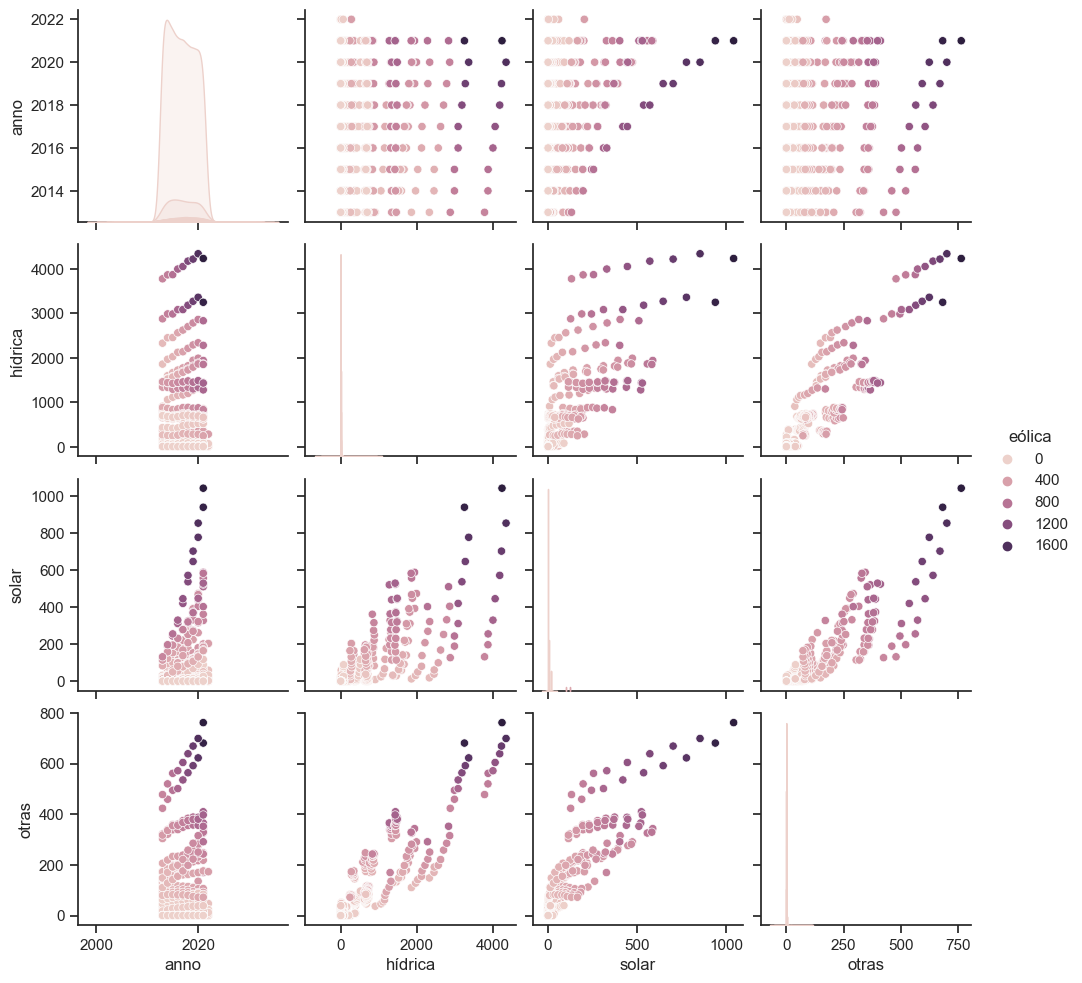

In [123]:
#Scatter Plot Matrix
sns.set_theme(style="ticks")
sns.pairplot(ee_renov_13_22, hue='eólica')

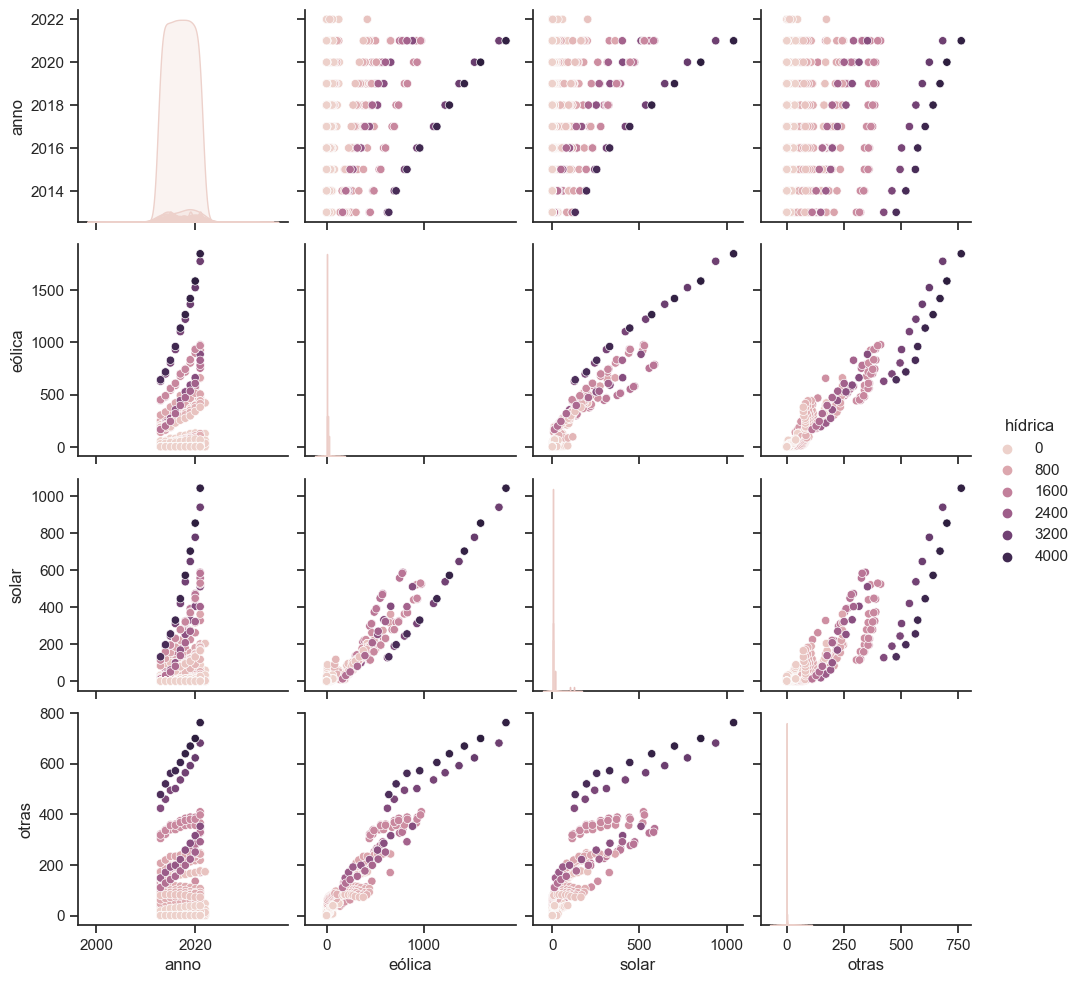

In [124]:
#Scatter Plot Matrix
sns.set_theme(style="ticks")
sns.pairplot(ee_renov_13_22, hue='hídrica')

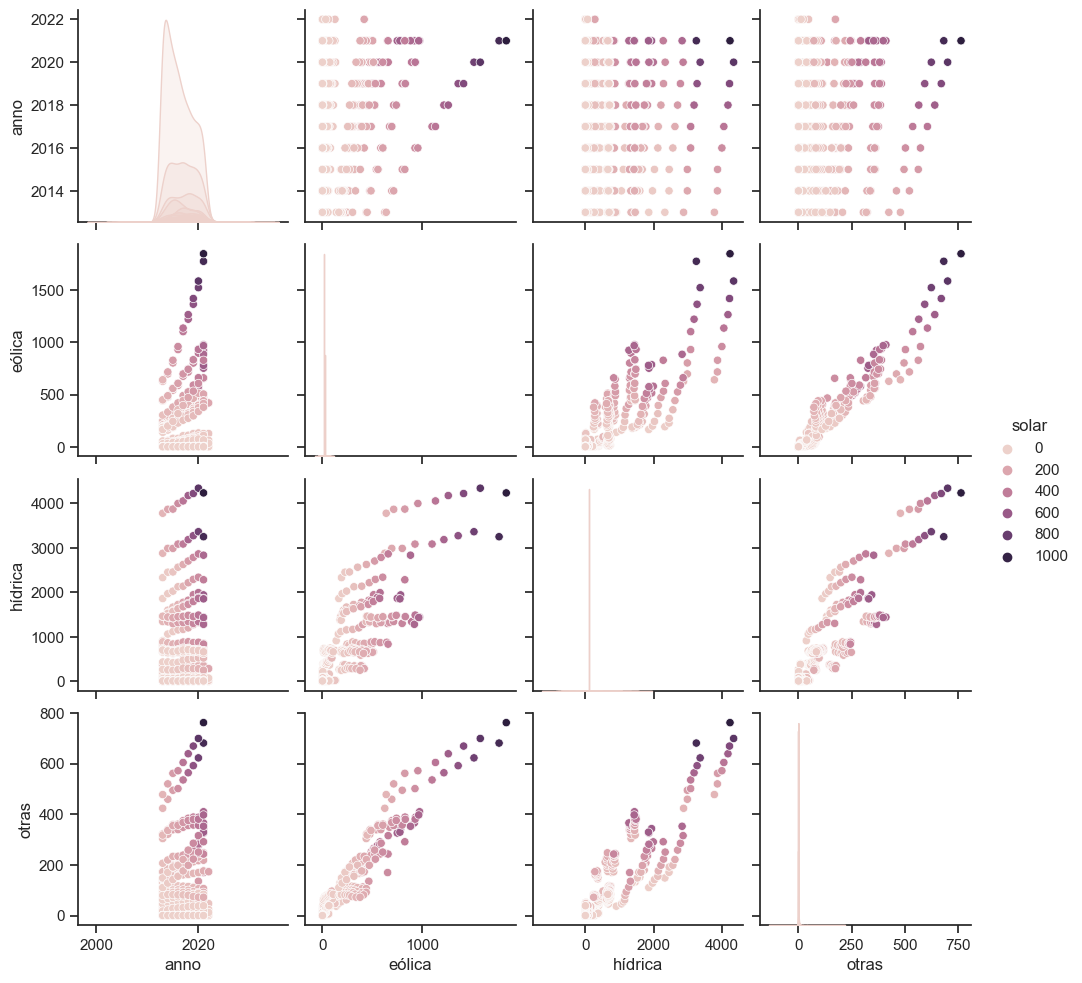

In [125]:
#Scatter Plot Matrix
sns.set_theme(style="ticks")
sns.pairplot(ee_renov_13_22, hue='solar')

#resultados del scatter Plot Matrix
la potencia de los diferentes tipos de electricidad fue aumentando con los años
parece que en el 2022 no hubo tantos registros ?

In [126]:
ee_renov_13_22.describe()

anno       eólica      hídrica        solar        otras
count  2250.000000  2241.000000  2240.000000  2250.000000  2214.000000
mean   2017.060889    44.755956   139.454752    19.145103    23.636676
std       2.625647   160.389977   471.805644    76.783219    78.210488
min    2013.000000     0.000000     0.000000     0.000000     0.000000
25%    2015.000000     0.000000     0.010000     0.000000     0.000000
50%    2017.000000     0.010000     1.870000     0.030000     0.100000
75%    2019.000000     2.320000    19.622500     1.047500     3.390000
max    2022.000000  1848.260000  4340.610000  1040.500000   761.930050

## Análisis de datos faltantes

In [127]:
import sklearn
sklearn.__version__

'1.2.2'

In [128]:
#¿Cuáles son los valores faltantes concretamente?

ee_renov_13_22[ee_renov_13_22.isna().any(axis=1)]

país código  anno     eólica     hídrica     solar  \
70                 Africa    NaN  2013   3.530000  116.390000  0.510000   
71                 Africa    NaN  2014   5.550000  121.680000  1.810000   
72                 Africa    NaN  2015   8.559999  119.330000  3.200000   
73                 Africa    NaN  2016  10.480000  118.520004  4.850000   
74                 Africa    NaN  2017  11.550000  125.040000  6.570000   
...                   ...    ...   ...        ...         ...       ...   
8695  Western Africa (BP)    NaN  2017   0.177543   18.712255  0.323034   
8696  Western Africa (BP)    NaN  2018   0.190098   19.954134  0.633409   
8697  Western Africa (BP)    NaN  2019   0.230108   22.519660  0.797325   
8698  Western Africa (BP)    NaN  2020   0.414805   22.249594  0.828578   
8699  Western Africa (BP)    NaN  2021   0.413192   23.579690  1.193521   

          otras  
70     5.390000  
71     8.309999  
72    10.650000  
73    10.260000  
74     9.650000  
...         ...  
8695   0.316682  
8696   0.216594  
8697   0.251494  
8698   0.247744  
8699   0.247609  

[345 rows x 7 columns]

In [129]:
#registros en que hay dato faltante en la variable eólica
ee_renov_13_22[ee_renov_13_22['eólica'].isna()]

país código  anno  eólica  hídrica  solar  otras
4873  Martinique    MTQ  2013     NaN      NaN    0.0    NaN
4874  Martinique    MTQ  2014     NaN      NaN    0.0    NaN
4875  Martinique    MTQ  2015     NaN      NaN    0.0    NaN
4876  Martinique    MTQ  2016     NaN      NaN    0.0    NaN
4877  Martinique    MTQ  2017     NaN      NaN    0.0    NaN
4878  Martinique    MTQ  2018     NaN      NaN    0.0    NaN
4879  Martinique    MTQ  2019     NaN      NaN    0.0    NaN
4880  Martinique    MTQ  2020     NaN      NaN    0.0    NaN
4881  Martinique    MTQ  2021     NaN      NaN    0.0    NaN

In [130]:
#registros en que hay dato faltante en la variable solar
ee_renov_13_22[ee_renov_13_22['solar'].isna()]

Empty DataFrame
Columns: [país, código, anno, eólica, hídrica, solar, otras]
Index: []

In [131]:
#registros en que hay dato faltante en la variable hídrica
ee_renov_13_22[ee_renov_13_22['hídrica'].isna()]

país código  anno  eólica  hídrica  solar  otras
4873    Martinique    MTQ  2013     NaN      NaN   0.00    NaN
4874    Martinique    MTQ  2014     NaN      NaN   0.00    NaN
4875    Martinique    MTQ  2015     NaN      NaN   0.00    NaN
4876    Martinique    MTQ  2016     NaN      NaN   0.00    NaN
4877    Martinique    MTQ  2017     NaN      NaN   0.00    NaN
4878    Martinique    MTQ  2018     NaN      NaN   0.00    NaN
4879    Martinique    MTQ  2019     NaN      NaN   0.00    NaN
4880    Martinique    MTQ  2020     NaN      NaN   0.00    NaN
4881    Martinique    MTQ  2021     NaN      NaN   0.00    NaN
6884  Saudi Arabia    SAU  2021     0.0      NaN   0.83    0.0

In [132]:
#registros en que hay dato faltante en la variable "otras"
ee_renov_13_22[ee_renov_13_22['otras'].isna()]

país código  anno  eólica  hídrica  solar  otras
970        Bermuda    BMU  2013     0.0      0.0    0.0    NaN
971        Bermuda    BMU  2014     0.0      0.0    0.0    NaN
972        Bermuda    BMU  2015     0.0      0.0    0.0    NaN
973        Bermuda    BMU  2016     0.0      0.0    0.0    NaN
974        Bermuda    BMU  2017     0.0      0.0    0.0    NaN
975        Bermuda    BMU  2018     0.0      0.0    0.0    NaN
976        Bermuda    BMU  2019     0.0      0.0    0.0    NaN
977        Bermuda    BMU  2020     0.0      0.0    0.0    NaN
978        Bermuda    BMU  2021     0.0      0.0    0.0    NaN
3126     Gibraltar    GIB  2013     0.0      0.0    0.0    NaN
3127     Gibraltar    GIB  2014     0.0      0.0    0.0    NaN
3128     Gibraltar    GIB  2015     0.0      0.0    0.0    NaN
3129     Gibraltar    GIB  2016     0.0      0.0    0.0    NaN
3130     Gibraltar    GIB  2017     0.0      0.0    0.0    NaN
3131     Gibraltar    GIB  2018     0.0      0.0    0.0    NaN
3132     Gibraltar    GIB  2019     0.0      0.0    0.0    NaN
3133     Gibraltar    GIB  2020     0.0      0.0    0.0    NaN
3134     Gibraltar    GIB  2021     0.0      0.0    0.0    NaN
4873    Martinique    MTQ  2013     NaN      NaN    0.0    NaN
4874    Martinique    MTQ  2014     NaN      NaN    0.0    NaN
4875    Martinique    MTQ  2015     NaN      NaN    0.0    NaN
4876    Martinique    MTQ  2016     NaN      NaN    0.0    NaN
4877    Martinique    MTQ  2017     NaN      NaN    0.0    NaN
4878    Martinique    MTQ  2018     NaN      NaN    0.0    NaN
4879    Martinique    MTQ  2019     NaN      NaN    0.0    NaN
4880    Martinique    MTQ  2020     NaN      NaN    0.0    NaN
4881    Martinique    MTQ  2021     NaN      NaN    0.0    NaN
6687  Saint Helena    SHN  2013     0.0      0.0    0.0    NaN
6688  Saint Helena    SHN  2014     0.0      0.0    0.0    NaN
6689  Saint Helena    SHN  2015     0.0      0.0    0.0    NaN
6690  Saint Helena    SHN  2016     0.0      0.0    0.0    NaN
6691  Saint Helena    SHN  2017     0.0      0.0    0.0    NaN
6692  Saint Helena    SHN  2018     0.0      0.0    0.0    NaN
6693  Saint Helena    SHN  2019     0.0      0.0    0.0    NaN
6694  Saint Helena    SHN  2020     0.0      0.0    0.0    NaN
6695  Saint Helena    SHN  2021     0.0      0.0    0.0    NaN

## Detección de outliers

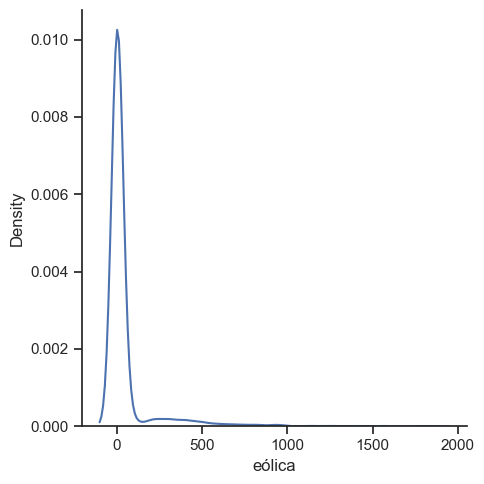

In [133]:
#en este caso usé el distplot kde porque representa mejor la distribución de las variables continuas
sns.displot(data=ee_renov_13_22, x= "eólica", kind="kde")
plt.show()


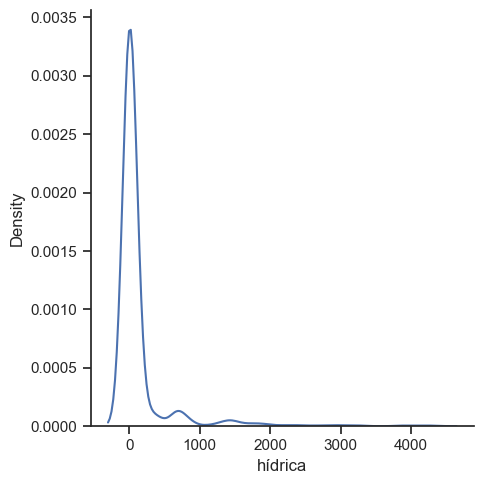

In [134]:
sns.displot(data=ee_renov_13_22, x= "hídrica", kind="kde")
plt.show()


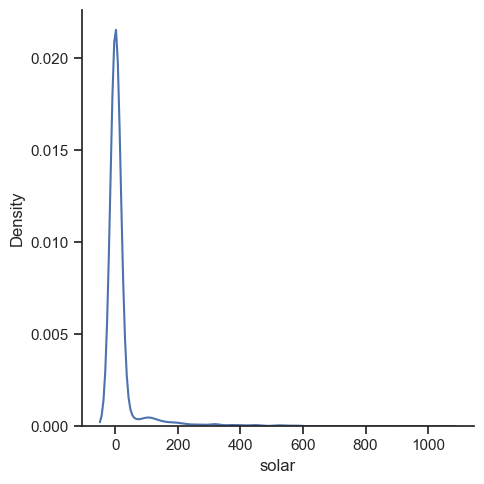

In [135]:
sns.displot(data=ee_renov_13_22, x= "solar", kind="kde")
plt.show()

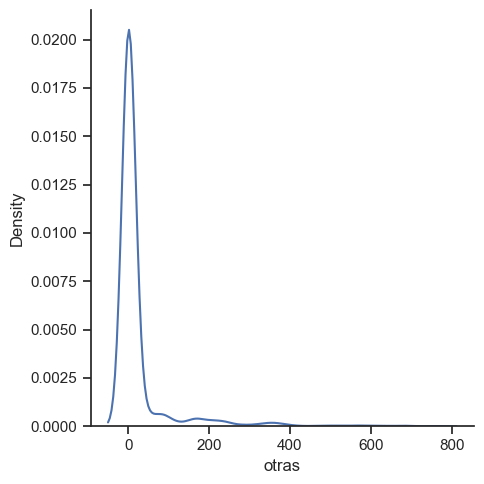

In [136]:
sns.displot(data=ee_renov_13_22, x= "otras", kind="kde")
plt.show()

### Detección de outliers mediante método de cuartiles

In [137]:
q1 = ee_renov_13_22['eólica'].quantile(0.25)
q3 = ee_renov_13_22['eólica'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

ee_renov_13_22_eol = ee_renov_13_22[(ee_renov_13_22['eólica'] > lb) & (ee_renov_13_22['eólica'] < ub)]

ee_renov_13_22_eol.reset_index(drop=True, inplace=True)

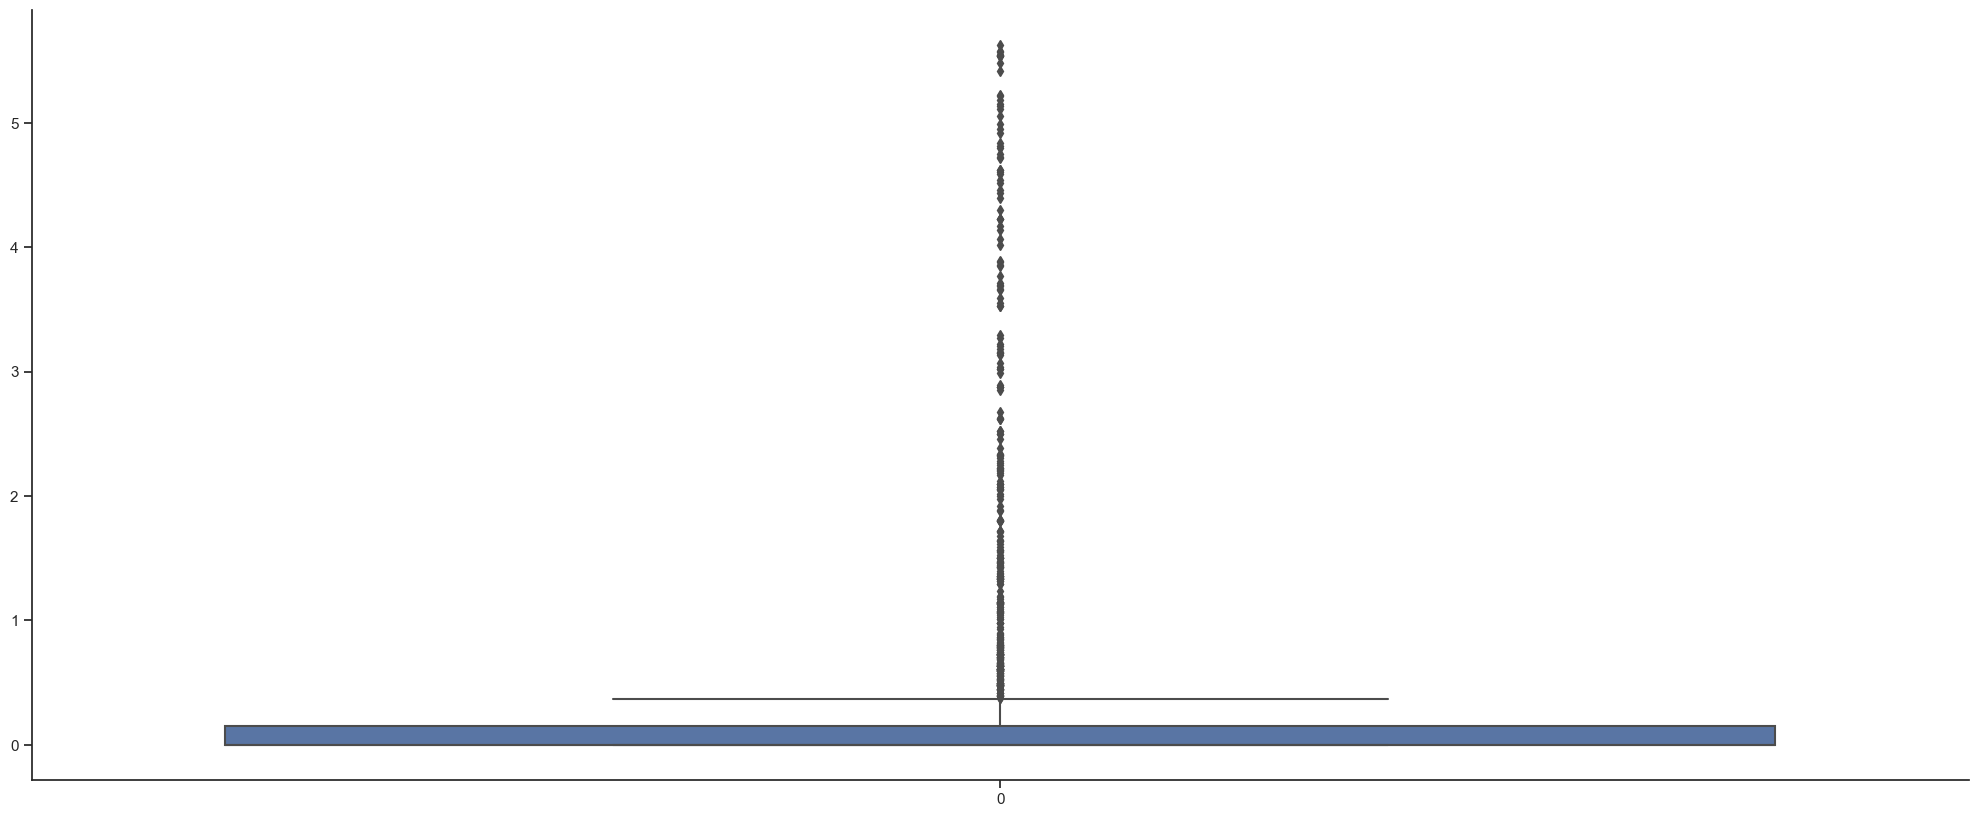

In [138]:
sns.boxplot(ee_renov_13_22_eol['eólica'])
sns.despine()

In [139]:
q1 = ee_renov_13_22['hídrica'].quantile(0.25)
q3 = ee_renov_13_22['hídrica'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)
ee_renov_13_22_hidr = ee_renov_13_22[(ee_renov_13_22['hídrica'] > lb) & (ee_renov_13_22['hídrica'] < ub)]
ee_renov_13_22_hidr.reset_index(drop=True, inplace=True)

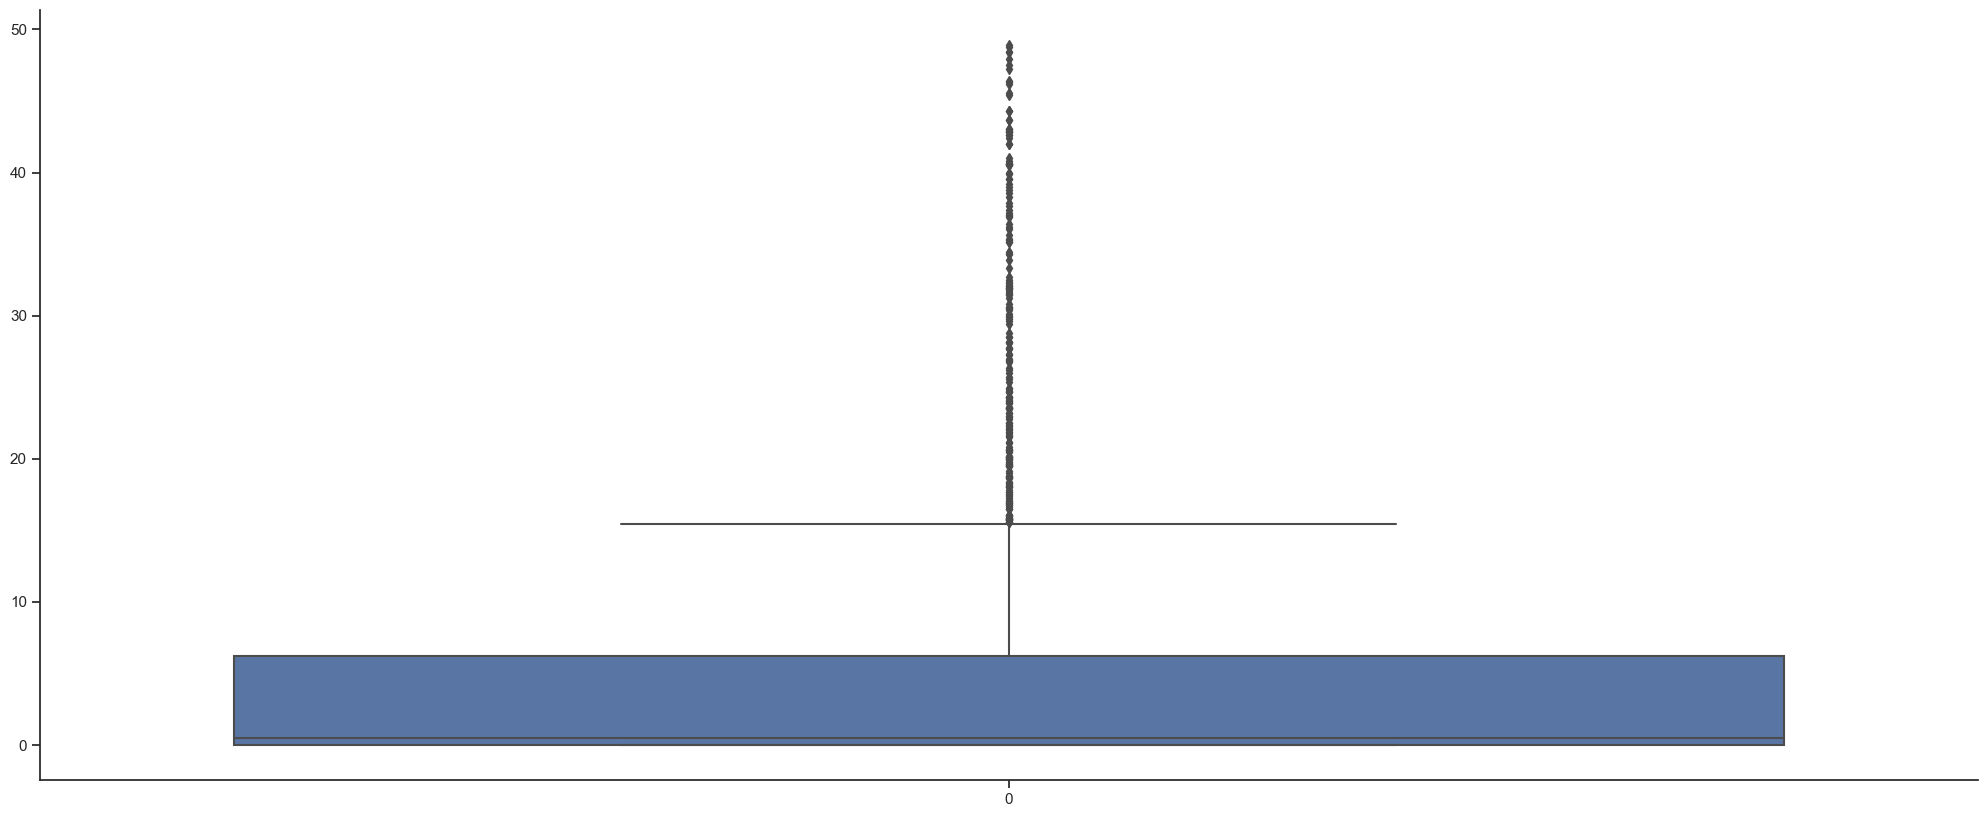

In [140]:
sns.boxplot(ee_renov_13_22_hidr['hídrica'])
sns.despine()

In [141]:
q1 = ee_renov_13_22['solar'].quantile(0.25)
q3 = ee_renov_13_22['solar'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)
ee_renov_13_22_solar = ee_renov_13_22[(ee_renov_13_22['solar'] > lb) & (ee_renov_13_22['solar'] < ub)]
ee_renov_13_22_solar.reset_index(drop=True, inplace=True)

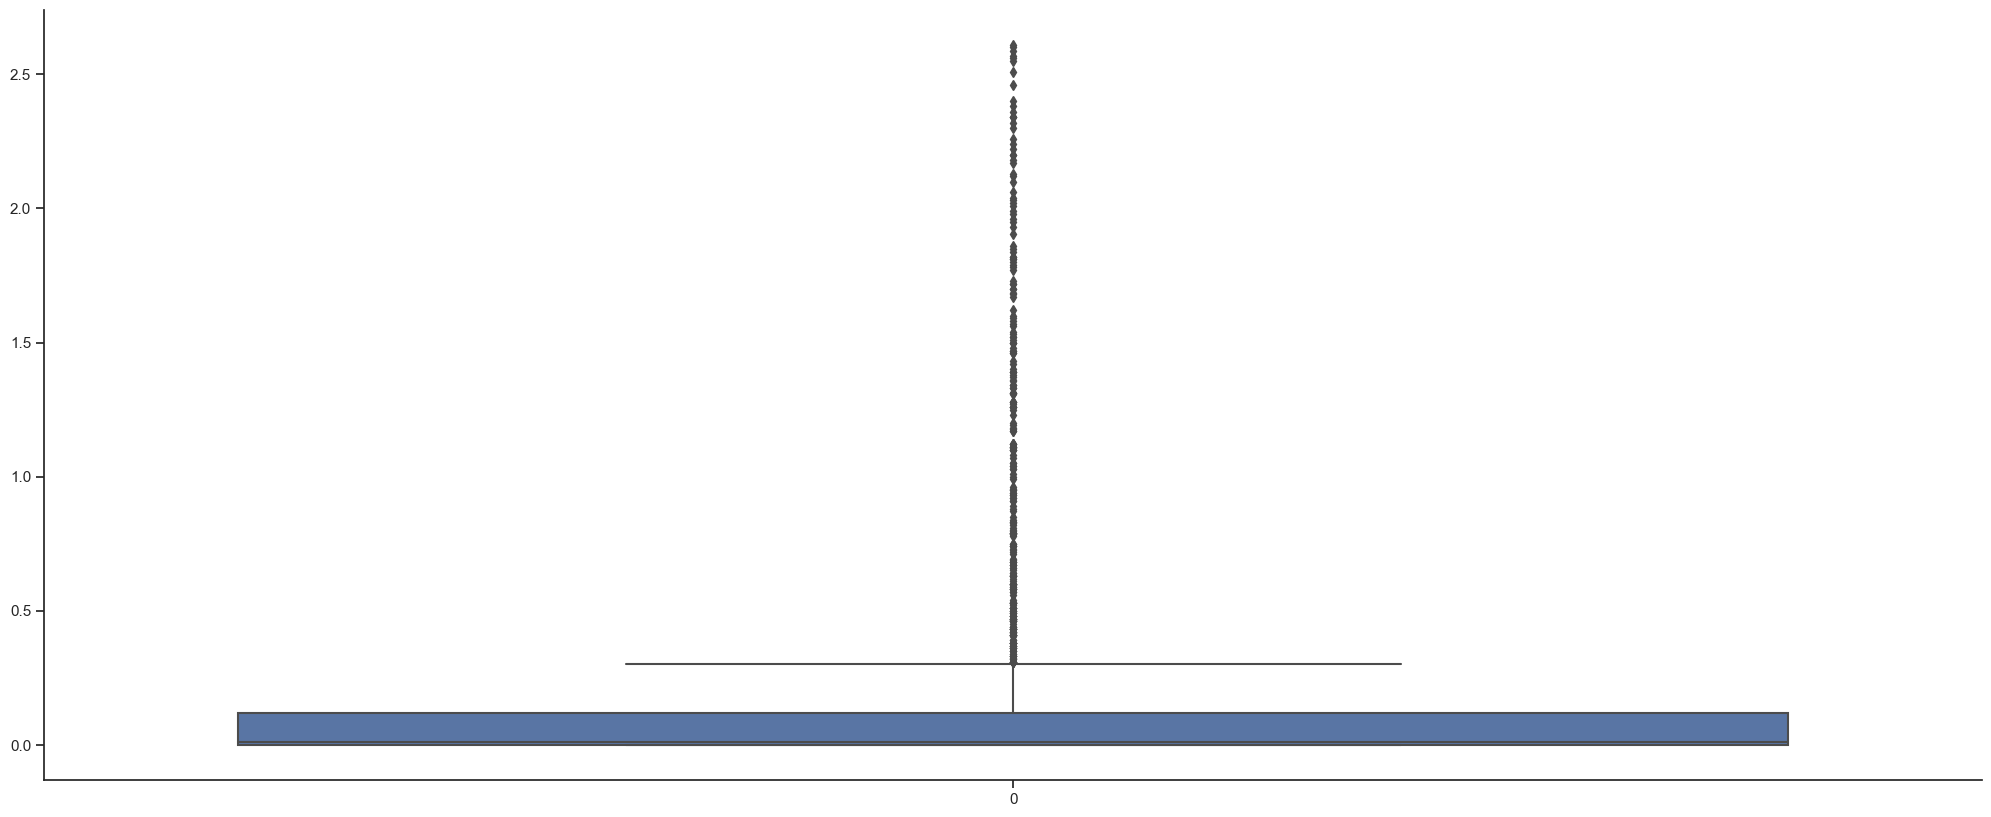

In [142]:
sns.boxplot(ee_renov_13_22_solar['solar'])
sns.despine()